In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
from statsmodels.tsa.arima.model import ARIMA
import math

## Mounting Google Drive in a Google Colab notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading Excel file using Pandas from a specific path from Google Drive

In [3]:
df0 = pd.read_excel('/content/drive/MyDrive/Data/online_retail_II.xlsx')

In [4]:
#Second data was on sheet 1
df1 = pd.read_excel('/content/drive/MyDrive/Data/online_retail_II.xlsx', sheet_name=1)

In [5]:
#Concatenating two DataFrames
retail_data = pd.concat([df0, df1], ignore_index=True)

In [6]:
df=retail_data

In [7]:
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [8]:
df.tail()

Invoice StockCode                      Description  Quantity  \
1067366  581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138    BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                          POSTAGE         1   

                InvoiceDate  Price  Customer ID Country  
1067366 2011-12-09 12:50:00   2.10      12680.0  France  
1067367 2011-12-09 12:50:00   4.15      12680.0  France  
1067368 2011-12-09 12:50:00   4.15      12680.0  France  
1067369 2011-12-09 12:50:00   4.95      12680.0  France  
1067370 2011-12-09 12:50:00  18.00      12680.0  France

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [10]:
df.describe()

Quantity                    InvoiceDate         Price  \
count  1.067371e+06                        1067371  1.067371e+06   
mean   9.938898e+00  2011-01-02 21:13:55.394028544  4.649388e+00   
min   -8.099500e+04            2009-12-01 07:45:00 -5.359436e+04   
25%    1.000000e+00            2010-07-09 09:46:00  1.250000e+00   
50%    3.000000e+00            2010-12-07 15:28:00  2.100000e+00   
75%    1.000000e+01            2011-07-22 10:23:00  4.150000e+00   
max    8.099500e+04            2011-12-09 12:50:00  3.897000e+04   
std    1.727058e+02                            NaN  1.235531e+02   

         Customer ID  
count  824364.000000  
mean    15324.638504  
min     12346.000000  
25%     13975.000000  
50%     15255.000000  
75%     16797.000000  
max     18287.000000  
std      1697.464450

In [11]:
df.shape

(1067371, 8)

In [12]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [13]:
for i in df.columns:
  print(i," ",df[i].unique())

Invoice   [489434 489435 489436 ... 581585 581586 581587]
StockCode   [85048 '79323P' '79323W' ... 23609 23617 23843]
Description   ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... 'mixed up'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Quantity   [    12     48     24 ...    698  80995 -80995]
InvoiceDate   <DatetimeArray>
['2009-12-01 07:45:00', '2009-12-01 07:46:00', '2009-12-01 09:06:00',
 '2009-12-01 09:08:00', '2009-12-01 09:24:00', '2009-12-01 09:28:00',
 '2009-12-01 09:43:00', '2009-12-01 09:44:00', '2009-12-01 09:46:00',
 '2009-12-01 09:50:00',
 ...
 '2011-12-09 12:09:00', '2011-12-09 12:16:00', '2011-12-09 12:19:00',
 '2011-12-09 12:20:00', '2011-12-09 12:21:00', '2011-12-09 12:23:00',
 '2011-12-09 12:25:00', '2011-12-09 12:31:00', '2011-12-09 12:49:00',
 '2011-12-09 12:50:00']
Length: 47635, dtype: datetime64[ns]
Price   [   6.95    6.75    2.1  ...  933.17 1714.17  224.69]
Customer ID   [13085. 13078. 15362. ...

In [14]:
uniq_products = df['Description'].unique()

In [15]:
df['Description'].nunique()

5698

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [17]:
# let clean the string of the description to understand the names of the products easily
df['Description'] = df['Description'].str.replace('.','').str.upper().str.strip()
df['Description'] = df['Description'].replace('\s+',' ',regex=True)

In [18]:
df['StockCode'].nunique()

5305

In [19]:
# Converting 'StockCode' column to uppercase and then to string type
df['StockCode'] = df['StockCode'].str.upper()
df['StockCode'] = df['StockCode'].astype(str)

In [20]:
df['StockCode'].isna().sum()

0

In [21]:
# finding the unusual StockCodes
Stock = df['StockCode'].unique()
Stock.sort()
unusual_codes = Stock[::-1][:]

print(' total unusual / Irrelevant stock codes are : ', len(unusual_codes))
print('Irrelevant stock codes: \n', unusual_codes)


 total unusual / Irrelevant stock codes are :  1543
Irrelevant stock codes: 
 ['nan' 'TEST002' 'TEST001' ... '10123G' '10123C' '10002R']


In [22]:
# Check if each StockCode contains at least one digit
CodeTypes = [any(char.isdigit() for char in code) for code in df['StockCode']]

In [23]:
if "False" in CodeTypes:
  print('there are irrevlevent stock codes')
else:
  print('there are no irrevlevent values')

there are no irrevlevent values


In [24]:
# Find the indices of StockCodes that contain only strings
Irrelevantstockindices = [i for i, v
 in enumerate(CodeTypes) if v == False]

In [25]:
len(Irrelevantstockindices)

937964

In [26]:
# REMOVING ROWS WITH IRRELEVANT STOCKCODES
df.drop(Irrelevantstockindices, inplace=True)

In [27]:
df.shape

(129407, 8)

In [28]:
# removing outlier from Price and Quantity column by using z-score method
data = df[(np.abs(sp.stats.zscore(df['Price'])) < 3) & (np.abs(sp.stats.zscore(df['Quantity'])) < 5)]

In [29]:
data

Invoice StockCode                      Description  Quantity  \
1        489434    79323P               PINK CHERRY LIGHTS        12   
2        489434    79323W              WHITE CHERRY LIGHTS        12   
12       489436    48173C             DOOR MAT BLACK FLOCK        10   
23       489436    35004B      SET OF 3 BLACK FLYING DUCKS        12   
28       489436    84596F     SMALL MARSHMALLOWS PINK BOWL         8   
...         ...       ...                              ...       ...   
1067239  581578    84997C  CHILDRENS CUTLERY POLKADOT BLUE         8   
1067270  581579    85099C    JUMBO BAG BAROQUE BLACK WHITE        10   
1067302  581580    84993A        75 GREEN PETIT FOUR CASES         2   
1067308  581580    85049A    TRADITIONAL CHRISTMAS RIBBONS         1   
1067317  581580    85049E        SCANDINAVIAN REDS RIBBONS         2   

                InvoiceDate  Price  Customer ID         Country  
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
12      2009-12-01 09:06:00   5.95      13078.0  United Kingdom  
23      2009-12-01 09:06:00   4.65      13078.0  United Kingdom  
28      2009-12-01 09:06:00   1.25      13078.0  United Kingdom  
...                     ...    ...          ...             ...  
1067239 2011-12-09 12:16:00   4.15      12713.0         Germany  
1067270 2011-12-09 12:19:00   1.79      17581.0  United Kingdom  
1067302 2011-12-09 12:20:00   0.42      12748.0  United Kingdom  
1067308 2011-12-09 12:20:00   1.25      12748.0  United Kingdom  
1067317 2011-12-09 12:20:00   1.25      12748.0  United Kingdom  

[127992 rows x 8 columns]

 **Data Cleaning**

In [30]:
filt = (data.Invoice.str.contains('C') == True)
data['Invoice'][filt]

179        C489449
185        C489449
196        C489459
197        C489459
198        C489459
            ...   
1062374    C581228
1062377    C581229
1062379    C581229
1063076    C581330
1064027    C581409
Name: Invoice, Length: 2178, dtype: object

In [31]:
unique_invoices = data['Invoice'].unique()

In [32]:
if (data['Quantity'] < 0).any():
    print("Column 'quantity' has negative values.")
else:
    print("Column 'Quantity' does not have negative values")

Column 'quantity' has negative values.


In [33]:
# Drop rows where Invoice number is positive and contains 'C'
filt = (data.Invoice.str.contains('C') == True)
data.drop(data[filt].index, inplace=True)

<ipython-input-33-716db9cef8cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[filt].index, inplace=True)


In [34]:
data['Invoice'] = data['Invoice'].astype(str)

<ipython-input-34-84c7f6ed0c6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Invoice'] = data['Invoice'].astype(str)


In [35]:
# drop  INCORRECT VALUES

# Drop rows where Quantity is positive and Invoice contains 'C'
filt1 = (data.Quantity > 0) & (data.Invoice.str.contains('C') == True)
data.drop(data[filt1].index, inplace=True)

# Drop rows where Quantity is negative and Invoice does not contain 'C'
filt2 = (data.Quantity < 0) & (data.Invoice.str.contains('C') == False)
data.drop(data[filt].index, inplace=True)


<ipython-input-35-3145b1f18f54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[filt1].index, inplace=True)
<ipython-input-35-3145b1f18f54>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.drop(data[filt].index, inplace=True)
<ipython-input-35-3145b1f18f54>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[filt].index, inplace=True)


In [36]:
data.head(50)

Invoice StockCode                          Description  Quantity  \
1    489434    79323P                   PINK CHERRY LIGHTS        12   
2    489434    79323W                  WHITE CHERRY LIGHTS        12   
12   489436    48173C                 DOOR MAT BLACK FLOCK        10   
23   489436    35004B          SET OF 3 BLACK FLYING DUCKS        12   
28   489436    84596F         SMALL MARSHMALLOWS PINK BOWL         8   
29   489436    84596L       BISCUITS SMALL BOWL LIGHT BLUE         8   
42   489437    84507B           STRIPES DESIGN MONKEY DOLL         6   
46   489437    84970S    HANGING HEART ZINC T-LIGHT HOLDER        12   
61   489438    84031A    CHARLIE+LOLA RED HOT WATER BOTTLE        56   
62   489438    84031B   CHARLIE LOLA BLUE HOT WATER BOTTLE        56   
63   489438    84032A   CHARLIE+LOLA PINK HOT WATER BOTTLE        60   
64   489438    84032B  CHARLIE + LOLA RED HOT WATER BOTTLE        56   
65   489438    84519A      TOMATO CHARLIE+LOLA COASTER SET        56   
66   489438    84519B      CARROT CHARLIE+LOLA COASTER SET        60   
67   489438    85132A         CHARLIE + LOLA BISCUITS TINS        60   
68   489438    85132C        CHARLIE AND LOLA FIGURES TINS        60   
69   489438    85183A   CHARLIE & LOLA WASTEPAPER BIN BLUE        60   
70   489438    85183B  CHARLIE & LOLA WASTEPAPER BIN FLORA        60   
75   489439    85014A     BLACK/BLUE DOTS RUFFLED UMBRELLA         3   
76   489439    85014B      RED/WHITE DOTS RUFFLED UMBRELLA         3   
77   489439    16161P                    WRAP ENGLISH ROSE        25   
78   489439    16169N            WRAP BLUE RUSSIAN FOLKART        25   
86   489439    85232B     SET/3 RUSSIAN DOLL STACKING TINS         6   
94   489441    84029E        RED WOOLLY HOTTIE WHITE HEART        36   
99   489442    84899E   YELLOW + BROWN BEAR FELT PURSE KIT        12   
102  489442    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
107  489442    84251J         GREETING CARD, THE BLACK CAT        12   
122  489443    82001S            VINYL RECORD FRAME SILVER        24   
127  489445    35916C     PINK FELT HANGING HEART W FLOWER        12   
128  489445    35916B     BLUE FELT HANGING HEART W FLOWER        12   
138  489445    18097C  WHITE TALL PORCELAIN T-LIGHT HOLDER         6   
147  489446    85123A   WHITE HANGING HEART T-LIGHT HOLDER        32   
161  489446    85099B           JUMBO BAG RED WHITE SPOTTY        20   
188  489450    85206A         CREAM FELT EASTER EGG BASKET         6   
194  489450    84970S    HANGING HEART ZINC T-LIGHT HOLDER        24   
209  489460    79323P                   PINK CHERRY LIGHTS         8   
218  489460    79323W                  WHITE CHERRY LIGHTS         8   
221  489460    79323S                 SILVER CHERRY LIGHTS         4   
232  489461    85071A  BLUE CHARLIE+LOLA PERSONAL DOORSIGN         6   
233  489461    85071B   RED CHARLIE+LOLA PERSONAL DOORSIGN         6   
241  489461    82494L           WOODEN FRAME ANTIQUE WHITE         6   
244  489462    90200D             PINK SWEETHEART BRACELET         3   
245  489462    90200E            GREEN SWEETHEART BRACELET         3   
252  489462    90200A           PURPLE SWEETHEART BRACELET         3   
253  489462    90200C             BLUE SWEETHEART BRACELET         3   
254  489462    90200B            BLACK SWEETHEART BRACELET         3   
255  489462    90185C       BLACK DIAMANTE EXPANDABLE RING         3   
256  489462    90185B    AMETHYST DIAMANTE EXPANDABLE RING         3   
257  489462    90003C  MIDNIGHT BLUE PAIR HEART HAIR SLIDE         3   
258  489462    90003D       CRYSTAL PAIR HEART HAIR SLIDES         3   

            InvoiceDate  Price  Customer ID         Country  
1   2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2   2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
12  2009-12-01 09:06:00   5.95      13078.0  United Kingdom  
23  2009-12-01 09:06:00   4.65      13078.0  United Kingdom  
28  2009-12-01 09:06:

In [37]:
# Drop rows where Description contains '?'
data.drop(data[data.Description.str.contains('?', regex=False) == True].index, inplace=True)

<ipython-input-37-be1803a0e51a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.Description.str.contains('?', regex=False) == True].index, inplace=True)


In [38]:
# Drop rows where Price is equal to 0
data.drop(data[data.Price == 0].index, inplace=True)

<ipython-input-38-54aab8415913>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.Price == 0].index, inplace=True)


In [39]:
# Fill missing Description values based on StockCode
for index, value in data.StockCode[data.Description.isna() == True].items():
    if pd.notna(data.Description[data.StockCode == value]).sum() != 0:
        data.Description[index] = data.Description[data.StockCode == value].mode()[0]
    else:
        data.drop(index=index, inplace=True)

In [40]:
# Convert 'Description' column to string type
data['Description'] = data['Description'].astype(str)

<ipython-input-40-384809b56a0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data['Description'].astype(str)


In [41]:
data

Invoice StockCode                      Description  Quantity  \
1        489434    79323P               PINK CHERRY LIGHTS        12   
2        489434    79323W              WHITE CHERRY LIGHTS        12   
12       489436    48173C             DOOR MAT BLACK FLOCK        10   
23       489436    35004B      SET OF 3 BLACK FLYING DUCKS        12   
28       489436    84596F     SMALL MARSHMALLOWS PINK BOWL         8   
...         ...       ...                              ...       ...   
1067239  581578    84997C  CHILDRENS CUTLERY POLKADOT BLUE         8   
1067270  581579    85099C    JUMBO BAG BAROQUE BLACK WHITE        10   
1067302  581580    84993A        75 GREEN PETIT FOUR CASES         2   
1067308  581580    85049A    TRADITIONAL CHRISTMAS RIBBONS         1   
1067317  581580    85049E        SCANDINAVIAN REDS RIBBONS         2   

                InvoiceDate  Price  Customer ID         Country  
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
12      2009-12-01 09:06:00   5.95      13078.0  United Kingdom  
23      2009-12-01 09:06:00   4.65      13078.0  United Kingdom  
28      2009-12-01 09:06:00   1.25      13078.0  United Kingdom  
...                     ...    ...          ...             ...  
1067239 2011-12-09 12:16:00   4.15      12713.0         Germany  
1067270 2011-12-09 12:19:00   1.79      17581.0  United Kingdom  
1067302 2011-12-09 12:20:00   0.42      12748.0  United Kingdom  
1067308 2011-12-09 12:20:00   1.25      12748.0  United Kingdom  
1067317 2011-12-09 12:20:00   1.25      12748.0  United Kingdom  

[124055 rows x 8 columns]

In [42]:
#Checking if there is any remaining null value in Data 'Quantity' column
data[data['Quantity'].isna()]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []

In [43]:
#Checking if Quantity is less than 0
filt = (data['Quantity']<0)
data.loc[filt]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []

In [44]:
# Make all quantity values non-negative by taking absolute values because they seems like useful not outliers
data['Quantity'] = data['Quantity'].abs()

<ipython-input-44-5b121cb8ebf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity'] = data['Quantity'].abs()


In [45]:
#Checking unique Countries in Data
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'EIRE', 'Germany',
       'Portugal', 'Poland', 'Channel Islands', 'Netherlands', 'Spain',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'United Arab Emirates',
       'Finland', 'Denmark', 'Italy', 'Switzerland', 'Belgium',
       'Unspecified', 'USA', 'Japan', 'Malta', 'Bahrain', 'RSA', 'Sweden',
       'Bermuda', 'Hong Kong', 'Singapore', 'Thailand', 'Israel',
       'Lithuania', 'Nigeria', 'West Indies', 'Korea', 'Brazil', 'Canada',
       'Iceland', 'Lebanon', 'Czech Republic', 'European Community'],
      dtype=object)

In [46]:
data['Country'].nunique()

42

In [47]:
# Selecting top 10 Products

# Group by 'StockCode' and sum the quantities
product_quantities = data.groupby('StockCode')['Quantity'].sum().reset_index()

# Sort products by quantity in descending order
sorted_products = product_quantities.sort_values(by='Quantity', ascending=False)

# Print top 10 products by quantity
print(sorted_products.head(10))

    StockCode  Quantity
899    85099B     89068
908    85123A     81646
901    85099F     33837
900    85099C     30766
815    84970S     27231
814    84970L     17884
495    82494L     16069
21     16156S     14561
26     16161P     12526
438    75049L     11393


Let import holidays data becasue most of the sales and demands of products are on holidays so we need to add holidays as well on the dataset

In [48]:
import holidays
# countries corresponding codes
countries_and_codes = {
    'UNITED KINGDOM': 'GB',
    'USA': 'US'
}

holiday_data = []

# Get holidays for each country between 2009 and 2011
for country, country_code in countries_and_codes.items():
    try:
        # Get holidays for the specified country and years 2009, 2010, and 2011
        country_holidays = holidays.CountryHoliday(country_code, years=[2009, 2010, 2011])

        # Append holiday data to the list
        for date, name in sorted(country_holidays.items()):
            holiday_data.append({'date': date, 'holiday': name})
    except:
        print(f'Could not fetch holidays for {country}')

holiday_df = pd.DataFrame(holiday_data)

# Define start and end dates
start_date = '2009-12-01'
end_date = '2011-12-09'

# Convert 'date' column to datetime
holiday_df['date'] = pd.to_datetime(holiday_df['date'])

# Filter DataFrame based on date range
filtered_df = holiday_df[holiday_df['date'].between(start_date, end_date)]

# Drop duplicate rows based on 'date' and 'holiday'
filtered_df_no_duplicates = filtered_df.drop_duplicates(subset=['date', 'holiday'])

In [49]:
filtered_df_no_duplicates

date                           holiday
4  2009-12-25                     Christmas Day
5  2009-12-26                        Boxing Day
6  2009-12-28             Boxing Day (observed)
7  2010-01-01                    New Year's Day
8  2010-04-02                       Good Friday
9  2010-05-03                           May Day
10 2010-05-31               Spring Bank Holiday
11 2010-12-25                     Christmas Day
12 2010-12-26                        Boxing Day
13 2010-12-27          Christmas Day (observed)
14 2010-12-28             Boxing Day (observed)
15 2011-01-01                    New Year's Day
16 2011-01-03         New Year's Day (observed)
17 2011-04-22                       Good Friday
18 2011-04-29  Wedding of William and Catherine
19 2011-05-02                           May Day
20 2011-05-30               Spring Bank Holiday
36 2010-01-18        Martin Luther King Jr. Day
37 2010-02-15             Washington's Birthday
38 2010-05-31                      Memorial Day
39 2010-07-04                  Independence Day
40 2010-07-05       Independence Day (observed)
41 2010-09-06                         Labor Day
42 2010-10-11                      Columbus Day
43 2010-11-11                      Veterans Day
44 2010-11-25                      Thanksgiving
45 2010-12-24          Christmas Day (observed)
47 2010-12-31         New Year's Day (observed)
49 2011-01-17        Martin Luther King Jr. Day
50 2011-02-21             Washington's Birthday
51 2011-05-30                      Memorial Day
52 2011-07-04                  Independence Day
53 2011-09-05                         Labor Day
54 2011-10-10                      Columbus Day
55 2011-11-11                      Veterans Day
56 2011-11-24                      Thanksgiving

In [50]:
# Extract days from 'InvoiceDate'
data['month'] = data['InvoiceDate'].dt.month
data['day'] = data['InvoiceDate'].dt.dayofyear
data['weekday'] = data['InvoiceDate'].dt.weekday

<ipython-input-50-6c057f0fa7ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['InvoiceDate'].dt.month
<ipython-input-50-6c057f0fa7ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = data['InvoiceDate'].dt.dayofyear
<ipython-input-50-6c057f0fa7ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [51]:
data.head()

Invoice StockCode                   Description  Quantity  \
1   489434    79323P            PINK CHERRY LIGHTS        12   
2   489434    79323W           WHITE CHERRY LIGHTS        12   
12  489436    48173C          DOOR MAT BLACK FLOCK        10   
23  489436    35004B   SET OF 3 BLACK FLYING DUCKS        12   
28  489436    84596F  SMALL MARSHMALLOWS PINK BOWL         8   

           InvoiceDate  Price  Customer ID         Country  month  day  \
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom     12  335   
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom     12  335   
12 2009-12-01 09:06:00   5.95      13078.0  United Kingdom     12  335   
23 2009-12-01 09:06:00   4.65      13078.0  United Kingdom     12  335   
28 2009-12-01 09:06:00   1.25      13078.0  United Kingdom     12  335   

    weekday  
1         1  
2         1  
12        1  
23        1  
28        1

In [52]:
import datetime
# Merge the dataframes
data = pd.merge(data, filtered_df_no_duplicates, how='left', left_on=data['InvoiceDate'].dt.date, right_on=filtered_df_no_duplicates['date'].dt.date)
# data = pd.merge(data, filtered_df_no_duplicates, left_on='InvoiceDate', right_on='date', how='left')

# List of unique holidays
unique_holidays = filtered_df_no_duplicates['holiday'].unique()

# Create columns for each holiday, fill with 1 if the holiday is observed, else fill with 0
for holiday in unique_holidays:
    data[holiday] = data['holiday'].apply(lambda x: 1 if x == holiday else 0)

# Drop redundant columns
data.drop(['date', 'holiday'], axis=1, inplace=True)

In [100]:
data.head()

key_0 Invoice StockCode                   Description  Quantity  \
0  2009-12-01  489434    79323P            PINK CHERRY LIGHTS        12   
1  2009-12-01  489434    79323W           WHITE CHERRY LIGHTS        12   
2  2009-12-01  489436    48173C          DOOR MAT BLACK FLOCK        10   
3  2009-12-01  489436    35004B   SET OF 3 BLACK FLYING DUCKS        12   
4  2009-12-01  489436    84596F  SMALL MARSHMALLOWS PINK BOWL         8   

          InvoiceDate  Price  Customer ID         Country  month  ...  \
0 2009-12-01 07:45:00   6.75      13085.0  United Kingdom     12  ...   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom     12  ...   
2 2009-12-01 09:06:00   5.95      13078.0  United Kingdom     12  ...   
3 2009-12-01 09:06:00   4.65      13078.0  United Kingdom     12  ...   
4 2009-12-01 09:06:00   1.25      13078.0  United Kingdom     12  ...   

   Wedding of William and Catherine  Martin Luther King Jr. Day  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   Washington's Birthday  Memorial Day  Independence Day  \
0                      0             0                 0   
1                      0             0                 0   
2                      0             0                 0   
3                      0             0                 0   
4                      0             0                 0   

   Independence Day (observed)  Labor Day  Columbus Day  Veterans Day  \
0                            0          0             0             0   
1                            0          0             0             0   
2                            0          0             0             0   
3                            0          0             0             0   
4                            0          0             0             0   

   Thanksgiving  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 31 columns]

**Modeling**

In [54]:
# Selecting the Top 10 Products to train them in the models

stock_codes = ['85099B', '85123A', '85099F', '85099C', '84970S', '84970L', '82494L', '16156S', '16161P', '84997D']


In [101]:
stock_dataframes = {}

In [104]:
for stock_code in stock_codes:
    # Extract data for the current stock code
    product_data = data[data['StockCode'] == stock_code]

    # Handle missing data if needed (example: drop NaN values)
    product_data = product_data.dropna()

    # Check if the DataFrame is not empty
    if not product_data.empty:
        # Set 'InvoiceDate' as the index
        product_data.set_index('InvoiceDate', inplace=True)

        # Resample with the appropriate aggregation method (sum for quantity, etc.)
        product_daily = product_data.resample('D').sum(numeric_only=True)

        # Store the results in the dictionary
        stock_dataframes[stock_code] = product_daily

# Save each stock's DataFrame to a CSV file
for stock_code, stock_dataframe in stock_dataframes.items():
    stock_dataframe.to_csv(f"//content/drive/MyDrive/Data/Top 10 products data/{stock_code}_data.csv", index=True)


In [105]:
stock_dataframes

{'85099B':              Quantity  Price  Customer ID  month   day  weekday  \
 InvoiceDate                                                       
 2009-12-01        159  21.45     166300.0    132  3685       11   
 2009-12-02        246  24.75     208981.0    156  4368       26   
 2009-12-03        142  21.45     163228.0    132  3707       33   
 2009-12-04        582  18.60     154088.0    120  3380       40   
 2009-12-05         40   3.90      32351.0     24   678       10   
 ...               ...    ...          ...    ...   ...      ...   
 2011-12-05         50  10.40      76072.0     60  1695        0   
 2011-12-06        174  20.51     154517.0    120  3400       10   
 2011-12-07         80  12.48      87391.0     72  2046       12   
 2011-12-08         92  12.48      92510.0     72  2052       18   
 2011-12-09         10   2.08      17001.0     12   343        4   
 
              Christmas Day  Boxing Day  Boxing Day (observed)  New Year's Day  \
 InvoiceDate          

In [106]:
p1 = pd.DataFrame(stock_dataframes['85123A'])

In [107]:
p1.head()

Quantity  Price  Customer ID  month   day  weekday  \
InvoiceDate                                                       
2009-12-01        257  45.20     240163.0    192  5360       16   
2009-12-02        267  43.05     231722.0    180  5040       30   
2009-12-03        357  60.75     318920.0    252  7077       63   
2009-12-04        179  37.95     196742.0    156  4394       52   
2009-12-05         96  16.10     101507.0     72  2034       30   

             Christmas Day  Boxing Day  Boxing Day (observed)  New Year's Day  \
InvoiceDate                                                                     
2009-12-01               0           0                      0               0   
2009-12-02               0           0                      0               0   
2009-12-03               0           0                      0               0   
2009-12-04               0           0                      0               0   
2009-12-05               0           0                      0               0   

             ...  Wedding of William and Catherine  \
InvoiceDate  ...                                     
2009-12-01   ...                                 0   
2009-12-02   ...                                 0   
2009-12-03   ...                                 0   
2009-12-04   ...                                 0   
2009-12-05   ...                                 0   

             Martin Luther King Jr. Day  Washington's Birthday  Memorial Day  \
InvoiceDate                                                                    
2009-12-01                            0                      0             0   
2009-12-02                            0                      0             0   
2009-12-03                            0                      0             0   
2009-12-04                            0                      0             0   
2009-12-05                            0                      0             0   

             Independence Day  Independence Day (observed)  Labor Day  \
InvoiceDate                                                             
2009-12-01                  0                            0          0   
2009-12-02                  0                            0          0   
2009-12-03                  0                            0          0   
2009-12-04                  0                            0          0   
2009-12-05                  0                            0          0   

             Columbus Day  Veterans Day  Thanksgiving  
InvoiceDate                                            
2009-12-01              0             0             0  
2009-12-02              0             0             0  
2009-12-03              0             0             0  
2009-12-04              0             0             0  
2009-12-05              0             0             0  

[5 rows x 25 columns]

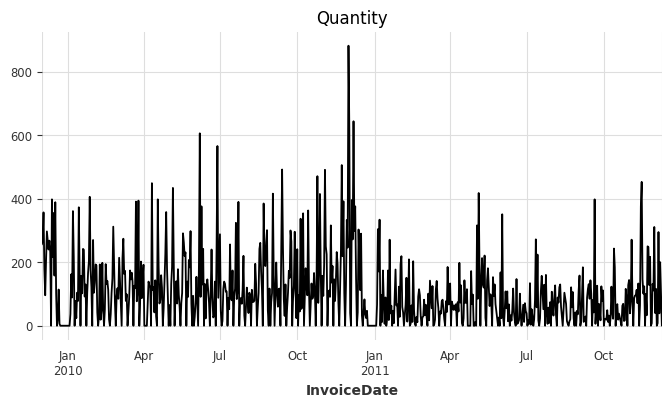

In [108]:
#plot quantity column
p1['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

**Modeling**

In [109]:
# split data into test and training
total_length = len(p1)
train_size = int(0.80 * total_length)

train_data = p1.iloc[:train_size]
test_data = p1.iloc[train_size:]

LSTM model

In [110]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [111]:
# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data['Quantity'].values.reshape(-1,1))

In [112]:
# Prepare the data for LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10
X_train, y_train = create_dataset(train_scaled, train_scaled, TIME_STEPS)

In [113]:
X_train.shape

(581, 10, 1)

In [114]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [115]:
# Fit the LSTM model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    shuffle=False
)

Epoch 1/100
15/15 [==============================] - 2s 35ms/step - loss: 0.0256 - val_loss: 0.0106
Epoch 2/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0186 - val_loss: 0.0089
Epoch 3/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0186 - val_loss: 0.0088
Epoch 4/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0184 - val_loss: 0.0089
Epoch 5/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0184 - val_loss: 0.0086
Epoch 6/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0183 - val_loss: 0.0087
Epoch 7/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0183 - val_loss: 0.0085
Epoch 8/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0183 - val_loss: 0.0085
Epoch 9/100
15/15 [==============================] - 0s 17ms/step - loss: 0.0183 - val_loss: 0.0084
Epoch 10/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0183 - val_loss: 0.0084

In [116]:
# make prediction on testing data
test_scaled = scaler.transform(test_data['Quantity'].values.reshape(-1,1))
X_test, y_test = create_dataset(test_scaled, test_scaled, TIME_STEPS)

predictions = model.predict(X_test)

# Invert scaling for predictions and actual
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

5/5 [==============================] - 0s 4ms/step


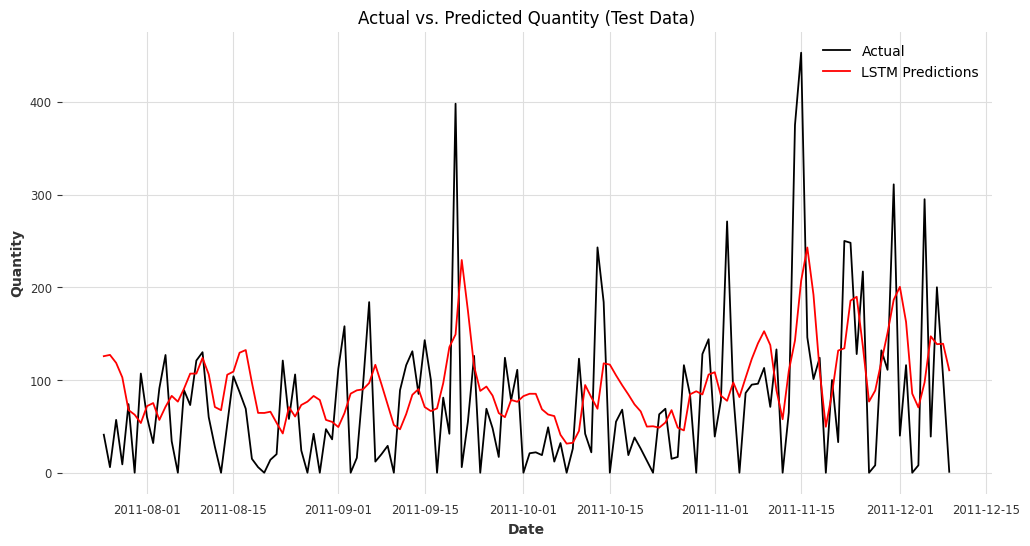

In [117]:
# Plot the actual vs. predicted values on the test data
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[TIME_STEPS:], actual, label='Actual')
plt.plot(test_data.index[TIME_STEPS:], predictions, color='red', label='LSTM Predictions')
plt.title('Actual vs. Predicted Quantity (Test Data)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()


ARIMA model

In [118]:
p1['Quantity']

InvoiceDate
2009-12-01    257
2009-12-02    267
2009-12-03    357
2009-12-04    179
2009-12-05     96
             ... 
2011-12-05    295
2011-12-06     39
2011-12-07    200
2011-12-08    103
2011-12-09      1
Freq: D, Name: Quantity, Length: 739, dtype: int64

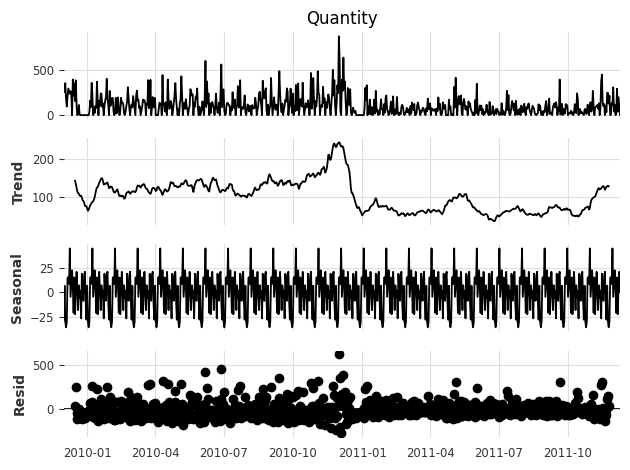

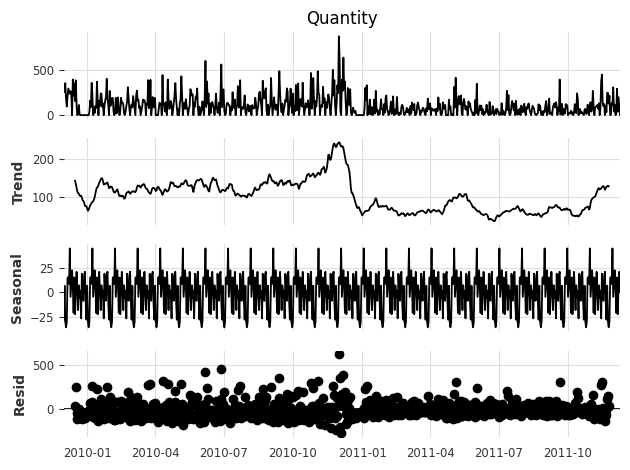

In [120]:
# lets check the trend and seasonality graph
from statsmodels.tsa.seasonal import seasonal_decompose

analysis = p1['Quantity'].copy()

decompose_result_add = seasonal_decompose(analysis, model="additive", period =30)

trend = decompose_result_add.trend
seasonal = decompose_result_add.seasonal
residual = decompose_result_add.resid

decompose_result_add.plot()

In [121]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))

    # Check whether the data is statioanry or non-stationary
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis. Reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against the null hypothesis which indicating data is non-stationary")

With the help of ADfuller you can see that our data is already stationary so we don't need to do differencing for make it statiionary

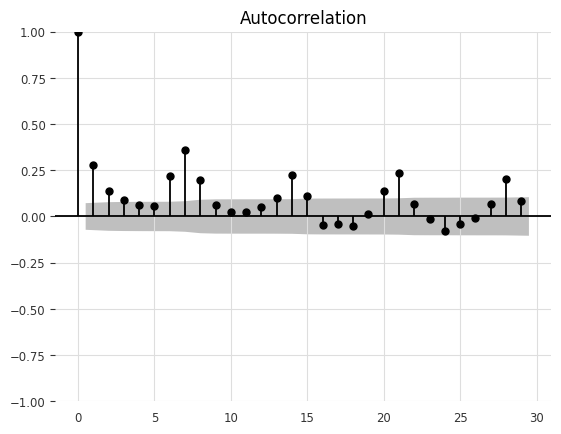

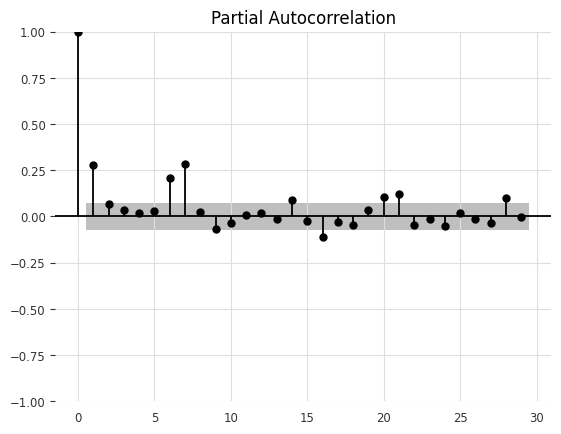

In [122]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#AutoCorrelation and Partial Correlation Plots of data
acf12 = plot_acf(p1["Quantity"].dropna())
pacf12 = plot_pacf(p1["Quantity"].dropna())

In [123]:
from statsmodels.tsa.arima.model import ARIMA

order = (5,1,0)
model = ARIMA(train_data['Quantity'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  591
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3629.760
Date:                Tue, 16 Apr 2024   AIC                           7271.520
Time:                        02:02:35   BIC                           7297.801
Sample:                    12-01-2009   HQIC                          7281.758
                         - 07-14-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6433      0.034    -19.176      0.000      -0.709      -0.578
ar.L2         -0.5195      0.036    -14.339      0.000      -0.591      -0.448
ar.L3         -0.4288      0.041    -10.352      0.0

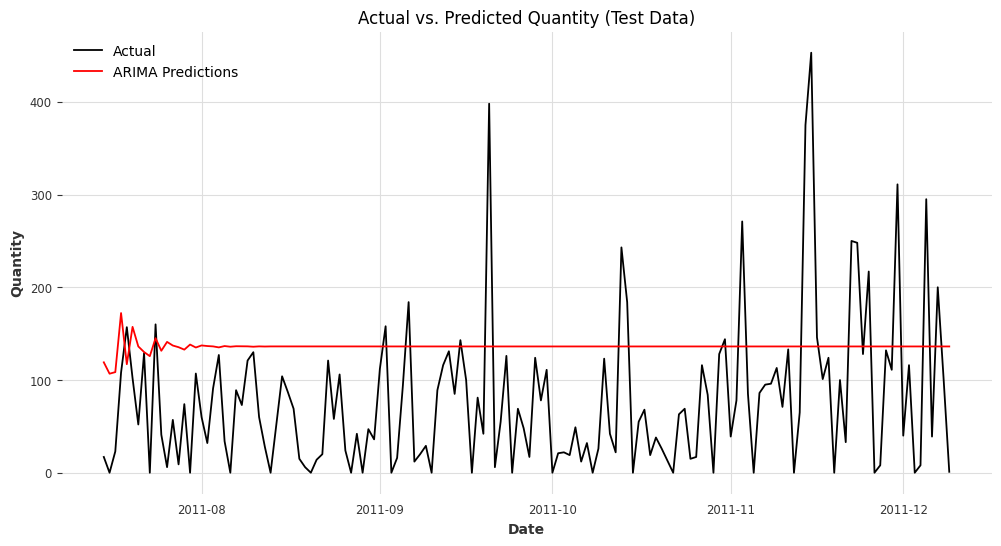

In [124]:
# Plot the actual vs. predicted values on the test data
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Quantity'], label='Actual')
plt.plot(test_data.index, model_fit.forecast(steps=len(test_data)), color='red', label='ARIMA Predictions')
plt.title('Actual vs. Predicted Quantity (Test Data)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

SARIMAX model

In [125]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMAX model
model_SARIMA = SARIMAX(endog=train_data['Quantity'],
                       order=(2, 1, 3),
                       seasonal_order=(1, 1, 1, 12)
                      )
model_SARIMA_fit = model_SARIMA.fit()

model_SARIMA_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             Quantity   No. Observations:                  591
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 12)   Log Likelihood               -3600.024
Date:                              Tue, 16 Apr 2024   AIC                           7216.048
Time:                                      02:02:44   BIC                           7250.925
Sample:                                  12-01-2009   HQIC                          7229.647
                                       - 07-14-2011                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2466      0.003    366.944      0.000       1.240       1.253
ar.L2         -0.9994      0.003   -372.891      0.000      -1.005      -0.994
ma.L1         -2.1326      0.054    -39.799      0.000      -2.238      -2.028
ma.L2          2.1057      0.114     18.494      0.000       1.883       2.329
ma.L3         -0.8931      0.067    -13.293      0.000      -1.025      -0.761
ar.S.L12       0.1727      0.097      1.778      0.075      -0.018       0.363
ma.S.L12      -0.9881      0.236     -4.184      0.000      -1.451      -0.525
sigma2      2.238e+04   4680.334      4.781      0.000    1.32e+04    3.15e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.51   Jarque-Bera (JB):               673.45
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             1.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
# Set the start and end dates for predictions
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

# Print the start and end dates
print(pred_start_date)
print(pred_end_date)

2011-07-15 00:00:00
2011-12-09 00:00:00


In [127]:
from datetime import datetime, timedelta

# Set the start and end dates for predictions manually
pred_start_date = datetime(2011, 7, 15)
pred_end_date = datetime(2011, 12, 9)

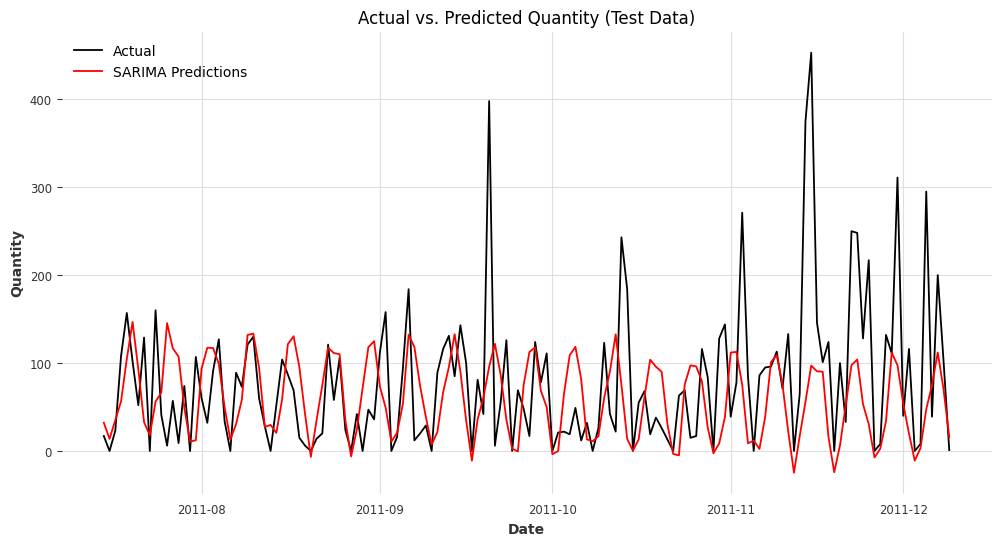

In [128]:
df_forecast = pd.DataFrame()
df_forecast['forecast'] = model_SARIMA_fit.predict(start=pred_start_date, end=pred_end_date,
                                                   dynamic=True)

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Quantity'], label='Actual')
plt.plot(test_data.index, df_forecast['forecast'], color='red', label='SARIMA Predictions')
plt.title('Actual vs. Predicted Quantity (Test Data)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# **DARTS library Models**

In [2]:
# #Importing Dart Library
# # !pip install darts

from darts.models import TCNModel,  NBEATSModel, BlockRNNModel, TiDEModel
from darts.metrics import mape, r2_score
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [130]:
p1

Quantity  Price  Customer ID  month   day  weekday  \
InvoiceDate                                                       
2009-12-01        257  45.20     240163.0    192  5360       16   
2009-12-02        267  43.05     231722.0    180  5040       30   
2009-12-03        357  60.75     318920.0    252  7077       63   
2009-12-04        179  37.95     196742.0    156  4394       52   
2009-12-05         96  16.10     101507.0     72  2034       30   
...               ...    ...          ...    ...   ...      ...   
2011-12-05        295  37.04     177857.0    144  4068        0   
2011-12-06         39  11.80      57762.0     48  1360        4   
2011-12-07        200  31.25     172452.0    132  3751       22   
2011-12-08        103  31.65     174924.0    132  3762       33   
2011-12-09          1   2.95      14446.0     12   343        4   

             Christmas Day  Boxing Day  Boxing Day (observed)  New Year's Day  \
InvoiceDate                                                                     
2009-12-01               0           0                      0               0   
2009-12-02               0           0                      0               0   
2009-12-03               0           0                      0               0   
2009-12-04               0           0                      0               0   
2009-12-05               0           0                      0               0   
...                    ...         ...                    ...             ...   
2011-12-05               0           0                      0               0   
2011-12-06               0           0                      0               0   
2011-12-07               0           0                      0               0   
2011-12-08               0           0                      0               0   
2011-12-09               0           0                      0               0   

             ...  Wedding of William and Catherine  \
InvoiceDate  ...                                     
2009-12-01   ...                                 0   
2009-12-02   ...                                 0   
2009-12-03   ...                                 0   
2009-12-04   ...                                 0   
2009-12-05   ...                                 0   
...          ...                               ...   
2011-12-05   ...                                 0   
2011-12-06   ...                                 0   
2011-12-07   ...                                 0   
2011-12-08   ...                                 0   
2011-12-09   ...                                 0   

             Martin Luther King Jr. Day  Washington's Birthday  Memorial Day  \
InvoiceDate                                                                    
2009-12-01                            0                      0             0   
2009-12-02                            0                      0             0   
2009-12-03                            0                      0             0   
2009-12-04                            0                      0             0   
2009-12-05                            0                      0             0   
...                                 ...                    ...           ...   
2011-12-05                            0                      0             0   
2011-12-06                            0                      0             0   
2011-12-07                            0                      0             0   
2011-12-08                            0                      0             0   
2011-12-09                            0                      0             0   

             Independence Day  Independence Day (observed)  Labor Day  \
InvoiceDate                                                             
2009-12-01                  0                            0          0   
2009-12-02                  0                            0          0   
2009-12-03                  0                      

In [167]:
import os

# Directory where CSV files are stored
csv_directory = "/content/drive/MyDrive/Data/Top 10 products data"

all_stock_dataframes = {}

# Iterating through CSV files in the directory
for filename in os.listdir(csv_directory):
    if filename.endswith("_data.csv"):
        # Construct the full file path
        file_path = os.path.join(csv_directory, filename)

        # Read CSV into a DataFrame and append to the list
        stock_dataframe = pd.read_csv(file_path, parse_dates=['InvoiceDate'], index_col='InvoiceDate')
        all_stock_dataframes[filename] = stock_dataframe



In [168]:
# Droping 'Customer ID' and 'Price' columns from all products in all_stock_dataframes
for file_name in all_stock_dataframes:
    all_stock_dataframes[file_name].drop(columns=['Customer ID', 'Price'], inplace=True)


In [169]:
from darts import TimeSeries

# Dictionary to store TimeSeries objects for each product
all_stock_dataframes_timeseries = {}

# Convert DataFrames to TimeSeries
for file_name in all_stock_dataframes:
    # Create TimeSeries object from DataFrame, considering 'Quantity' as the value column
    all_stock_dataframes_timeseries[file_name] = TimeSeries.from_dataframe(all_stock_dataframes[file_name], value_cols='Quantity')


In [170]:
from darts import TimeSeries

# Dictionary to store TimeSeries objects for each product
all_stock_dataframes_timeseries_temp = {}

# Convert DataFrames to TimeSeries with all columns (except the first) as value columns
for file_name in all_stock_dataframes:
    # Create TimeSeries object from DataFrame, considering all columns (except the first) as value columns
    all_stock_dataframes_timeseries_temp[file_name] = TimeSeries.from_dataframe(
        all_stock_dataframes[file_name],
        value_cols=all_stock_dataframes[file_name].columns[1:]
    )


**Scale dataset**

In [171]:
from darts.dataprocessing.transformers import Scaler

# Create dictionaries to store scalers and scaled time series for each stock code
scalers_timeseries = {}
scalers_timeseries_temp = {}
all_stock_dataframes_timeseries_scaled = {}
all_stock_dataframes_timeseries_temp_scaled = {}

# Iterate through the TimeSeries objects in the dictionaries
for file_name in all_stock_dataframes_timeseries:
    # Create a scaler for the current stock code
    scaler = Scaler()  # Replace with the appropriate scaler class and parameters

    # Fit the scaler on the TimeSeries and transform it
    scaled_data = scaler.fit_transform(all_stock_dataframes_timeseries[file_name])

    # Store the scaler in the dictionary
    scalers_timeseries[file_name] = scaler

    # Update the dictionary with the scaled TimeSeries
    all_stock_dataframes_timeseries_scaled[file_name] = scaled_data

# Repeat the process for the second set of TimeSeries
for file_name in all_stock_dataframes_timeseries_temp:
    # Create a scaler for the current stock code
    scaler = Scaler()  # Replace with the appropriate scaler class and parameters

    # Fit the scaler on the TimeSeries and transform it
    scaled_data = scaler.fit_transform(all_stock_dataframes_timeseries_temp[file_name])

    # Store the scaler in the dictionary
    scalers_timeseries_temp[file_name] = scaler

    # Update the dictionary with the scaled TimeSeries
    all_stock_dataframes_timeseries_temp_scaled[file_name] = scaled_data


**Splitting dataset for training and testing**

In [172]:
# Dictionaries to store training and validation sets for each stock code
training_data = {}
val_data = {}

# Iterate through the scaled TimeSeries objects
for file_name in all_stock_dataframes_timeseries_scaled:
    # Split the TimeSeries into training and validation sets
    train, val = all_stock_dataframes_timeseries_scaled[file_name][:-36], all_stock_dataframes_timeseries_scaled[file_name][-36:]

    # Store the training and validation sets in the dictionaries
    training_data[file_name], val_data[file_name] = train, val


**Initializing models**

In [173]:
# initializing function for training models
def eval_model(model_type):


    # Initialize the model based on the specified type
    if model_type == 'NBEATSModel':
        model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=20, random_state=0, activation='LeakyReLU')
    elif model_type == 'TiDEModel':
        model = TiDEModel(input_chunk_length=24, output_chunk_length=12, n_epochs=50)
    elif model_type == 'BlockRNN_test':
        model_name = "BlockRNN_test"
        model = BlockRNNModel(model="LSTM", input_chunk_length=24, output_chunk_length=12, n_epochs=50, random_state=0, model_name=model_name, save_checkpoints=True, force_reset=True)
    elif model_type == 'TCN_model':
        model_name = "TCN_model"
        model = TCNModel(
            input_chunk_length=24,
            output_chunk_length=12,
            n_epochs=200,
            dropout=0.1,
            dilation_base=2,
            weight_norm=True,
            kernel_size=5,
            num_filters=3,
            random_state=0,
            save_checkpoints=True,
            model_name=model_name,
            force_reset=True,
        )
    else:
        print('No model found')
        return None

    # Train the model
    start_time = datetime.now()
    model.fit([training_data[key] for key in training_data], past_covariates=[all_stock_dataframes_timeseries_temp_scaled[key] for key in all_stock_dataframes_timeseries_temp_scaled], verbose=True)
    time_elapsed = datetime.now() - start_time

    return model


In [174]:
# this function used for making prediction and compare with actual values
def model_predict(model):

    for key in training_data:
        # Make predictions for the validation set
        pred = model.predict(n=36, series=training_data[key], past_covariates=all_stock_dataframes_timeseries_temp_scaled[key])

        # Extract actual and predicted time series data
        actual = val_data[key][-36:].values().reshape(-1, 1)
        predicted = pred.values().reshape(-1, 1)

        # Calculate metrics
        mae = mean_absolute_error(actual, predicted)
        mse = mean_squared_error(actual, predicted)
        rmse = np.sqrt(mse)

        # Display metrics
        print('Metrics for Model Evaluation')
        print('Mean Absolute Error (MAE): {:.2f}'.format(mae))
        print('Mean Squared Error (MSE): {:.2f}'.format(mse))
        print('Root Mean Squared Error (RMSE): {:.2f}'.format(rmse))


        # Visualize actual vs. predicted time series data
        plt.figure(figsize=(10, 6))
        val_data[key][-36:].plot(label='Actual')
        pred.plot(label='Forecast')
        plt.title(f"Stock: {key}")
        plt.xlabel("Date")
        plt.ylabel("Quantity")
        plt.legend()
        plt.show()


**NBEATSModel**

In [175]:
# Train NBEATSModel
model_Nbeatsmodel = eval_model('NBEATSModel')

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 10.4 M
---------------------------------------------------
10.4 M    Trainable params
4.6 K     Non-trainable params
10.4 M    Total params
41.578    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


Time to train model: 0:05:11.230454


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15


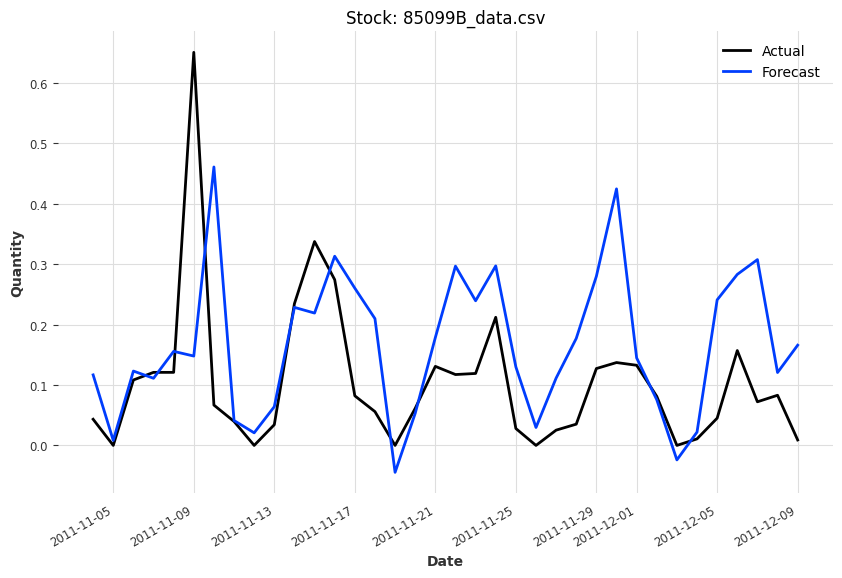

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.12


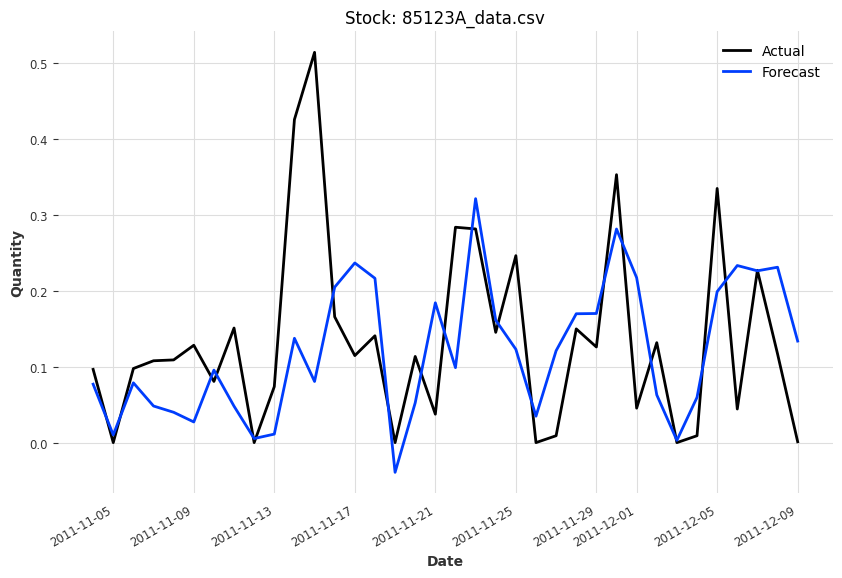

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14


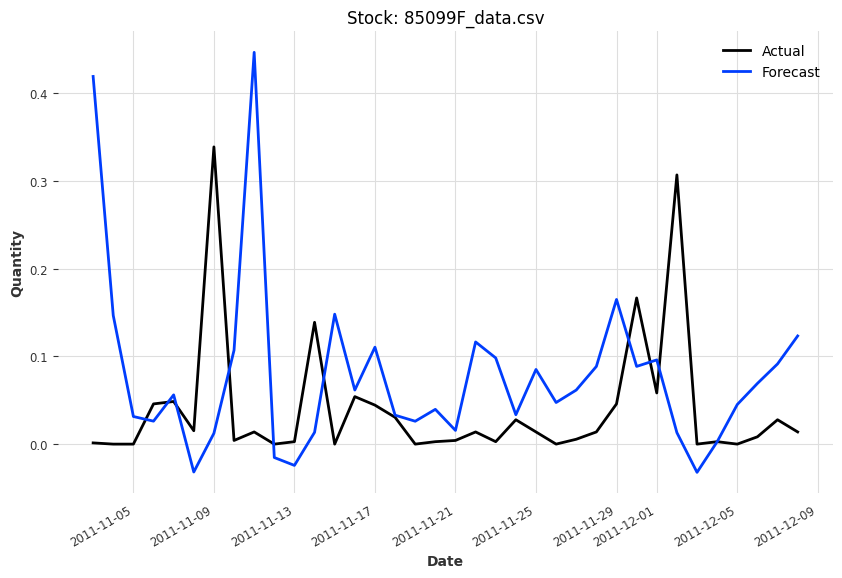

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14


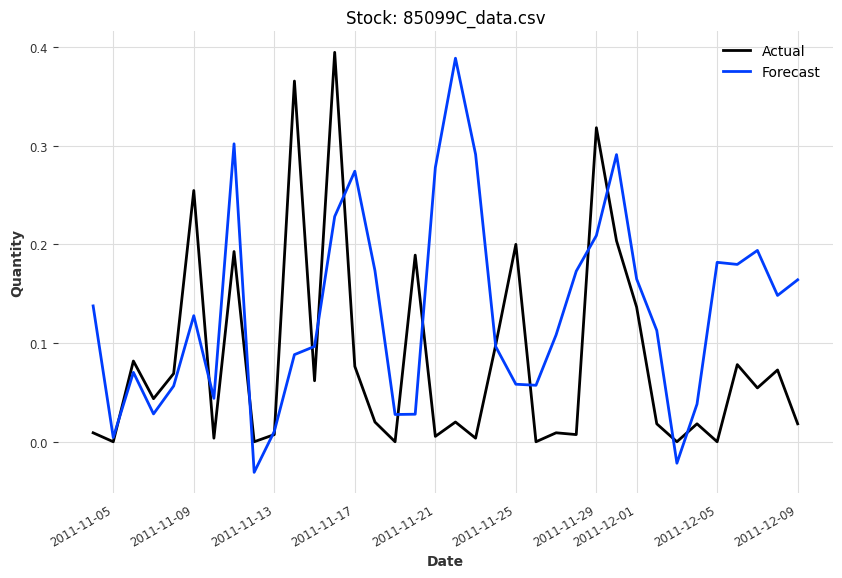

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.09


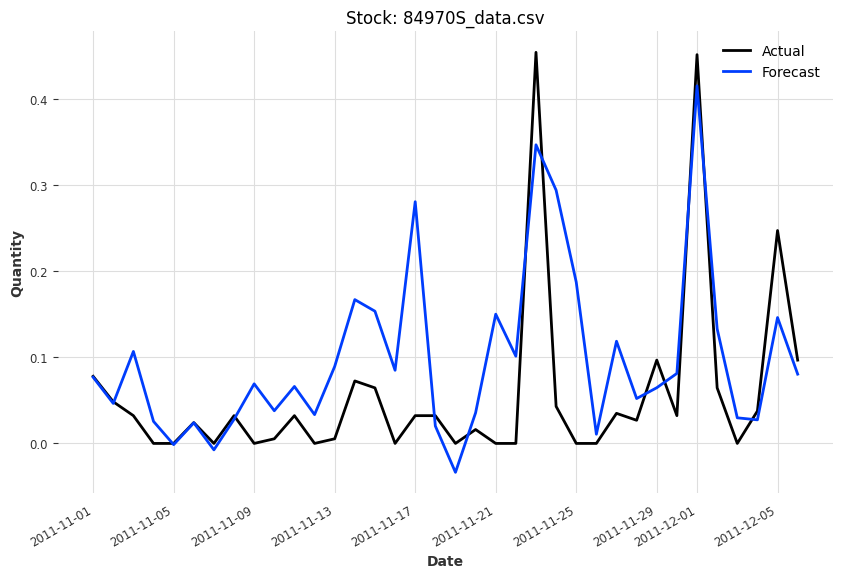

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.07


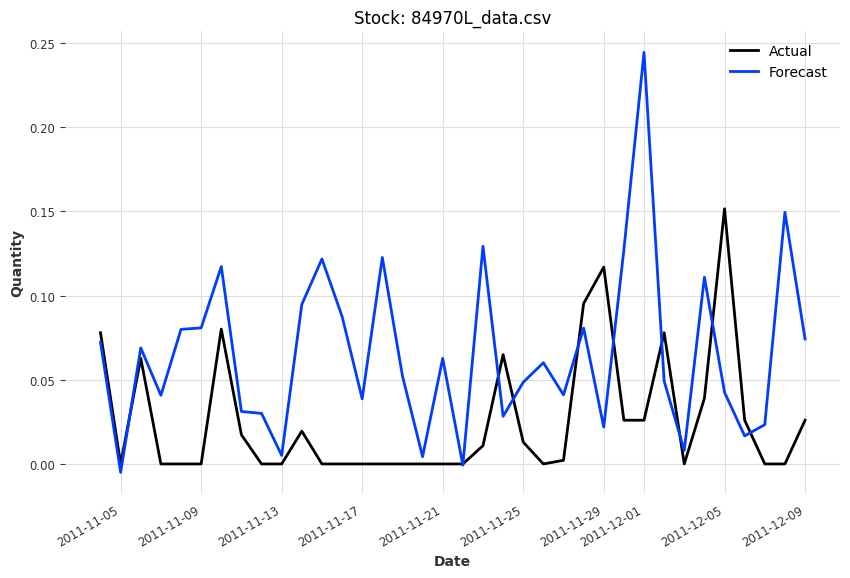

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15


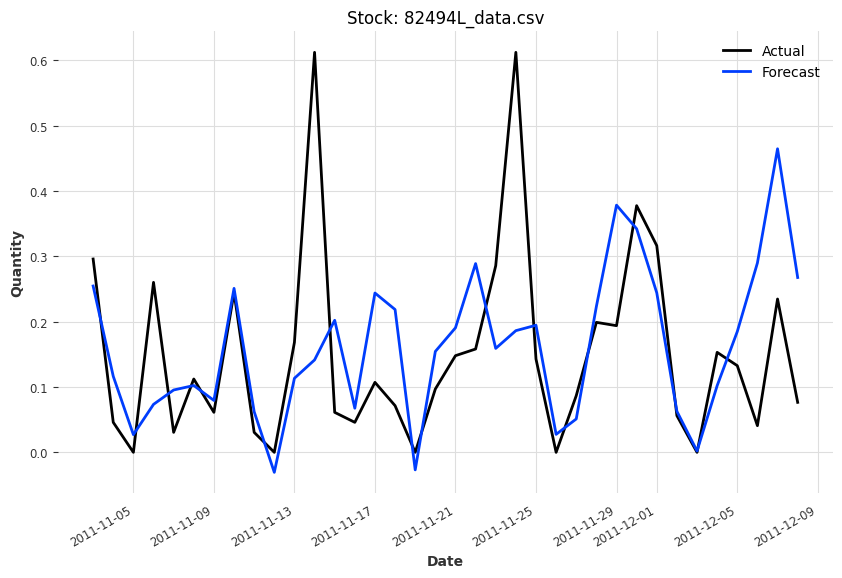

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.09


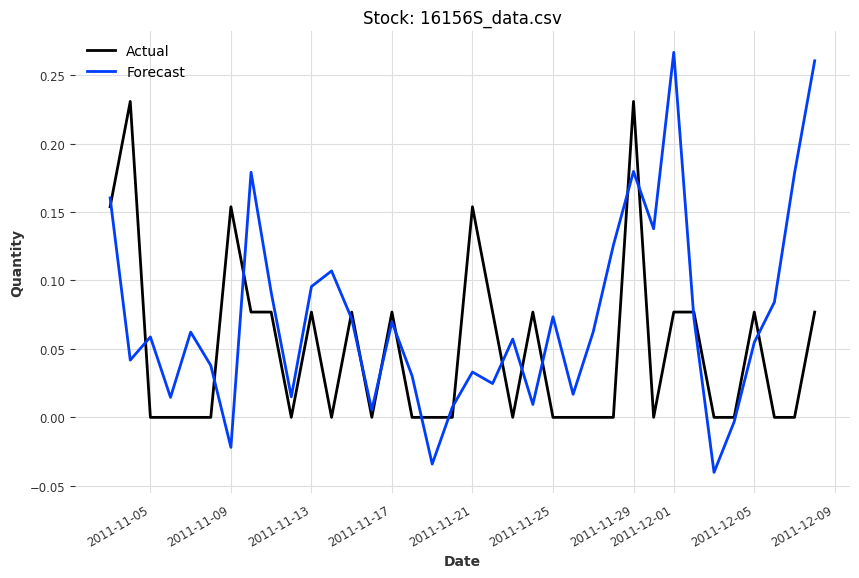

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17


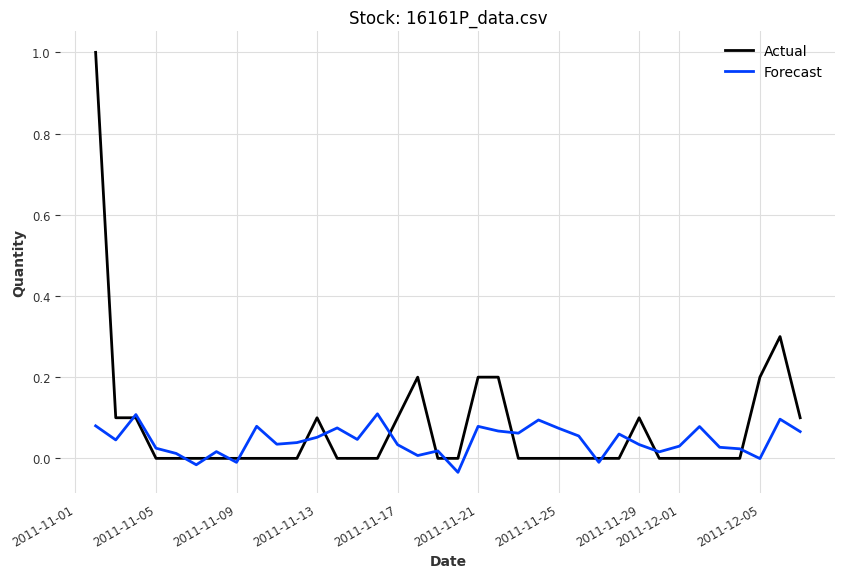

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17


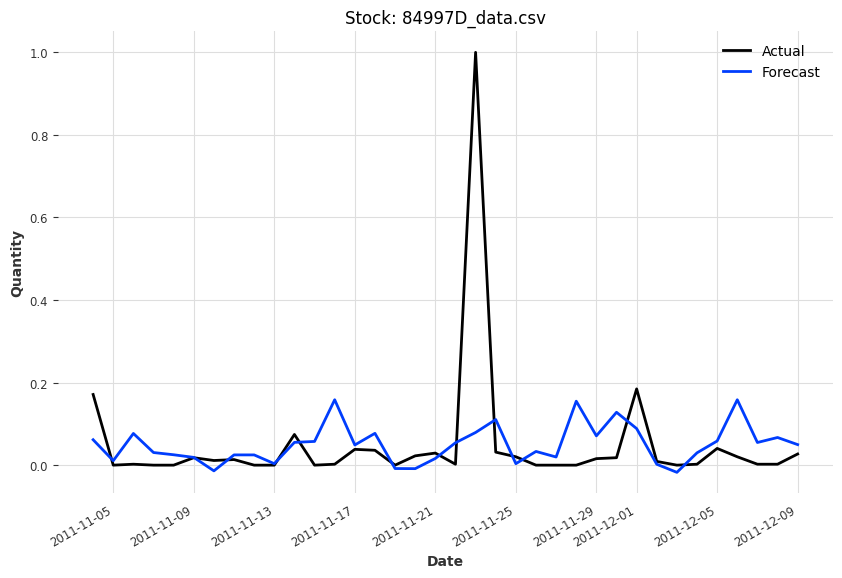

In [176]:
#Predicting model on every product
model_predict(model_Nbeatsmodel)

**TiDE Model**

In [177]:
#Training TiDEModel
TiDEModel = eval_model('TiDEModel')

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type             | Params
---------------------------------------------------------
0 | criterion           | MSELoss          | 0     
1 | train_metrics       | MetricCollection | 0     
2 | val_metrics         | MetricCollection | 0     
3 | past_cov_projection | _ResidualBlock   | 3.6 K 
4 | encoders            | Sequential       | 47.5 K
5 | decoders            | Sequential       | 66.0 K
6 | temporal_decoder    | _ResidualBlock   | 594   
7 | lookback_skip       | Linear           | 300   
-------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


Time to train model: 0:02:48.069411


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14


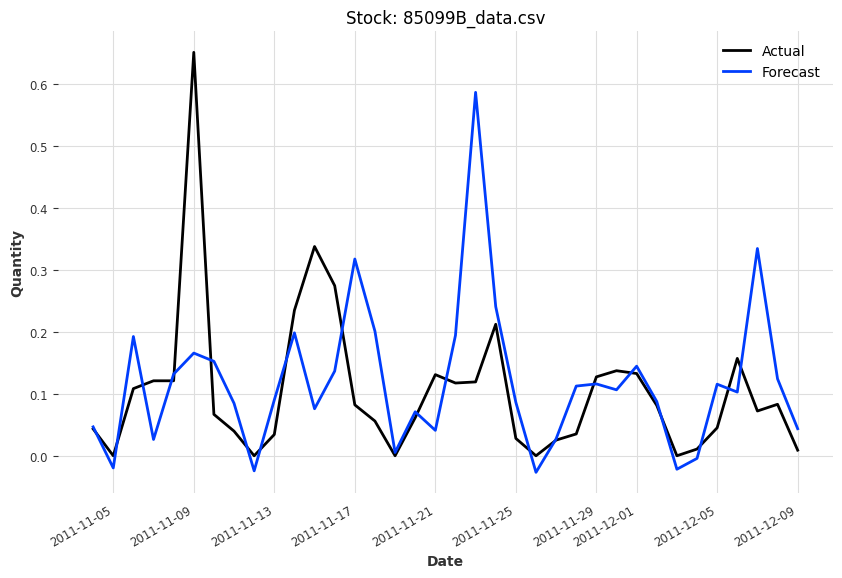

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15


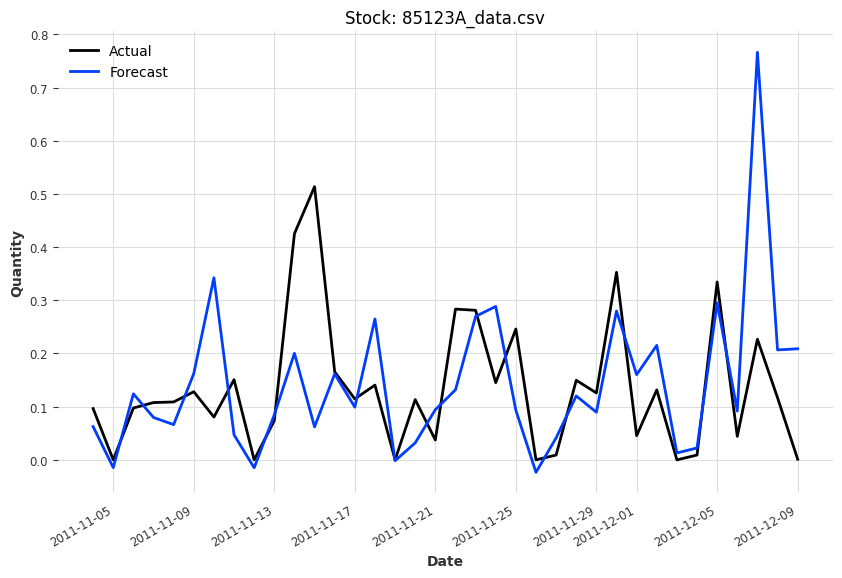

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.10


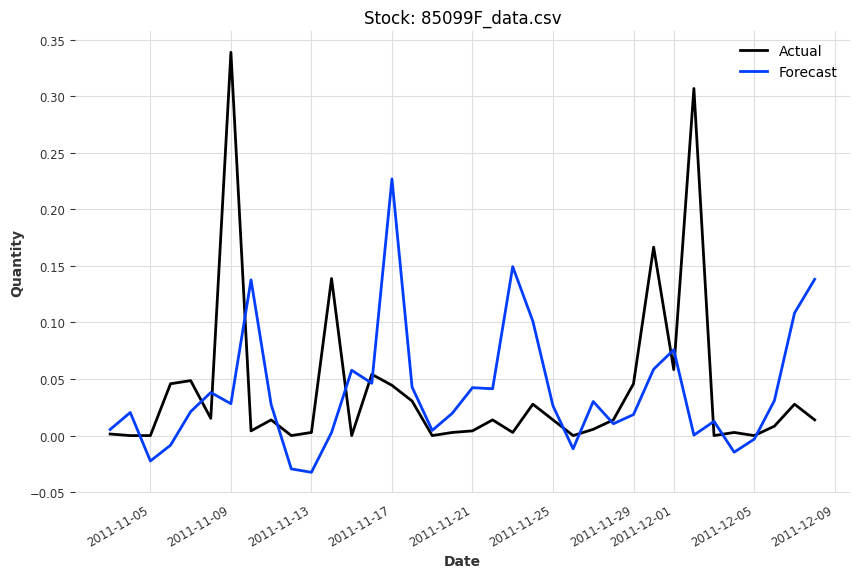

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.12


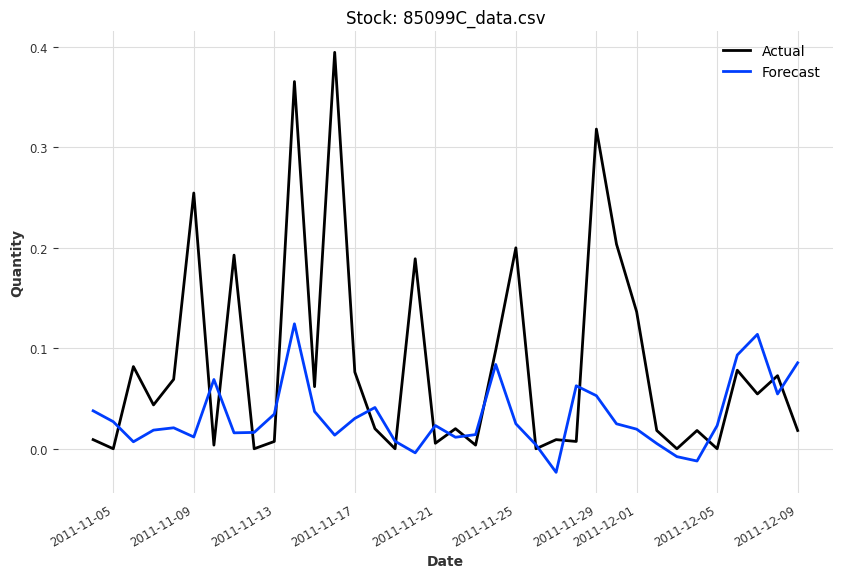

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.09


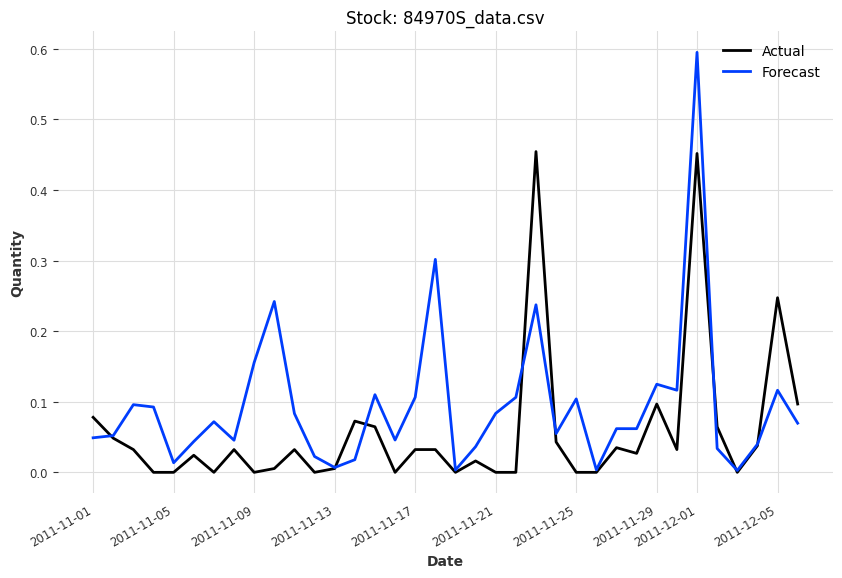

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.08


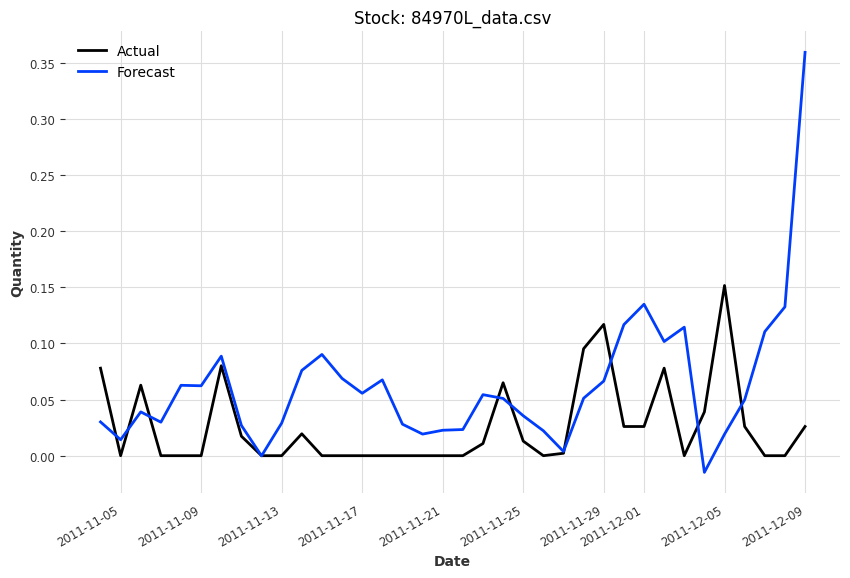

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14


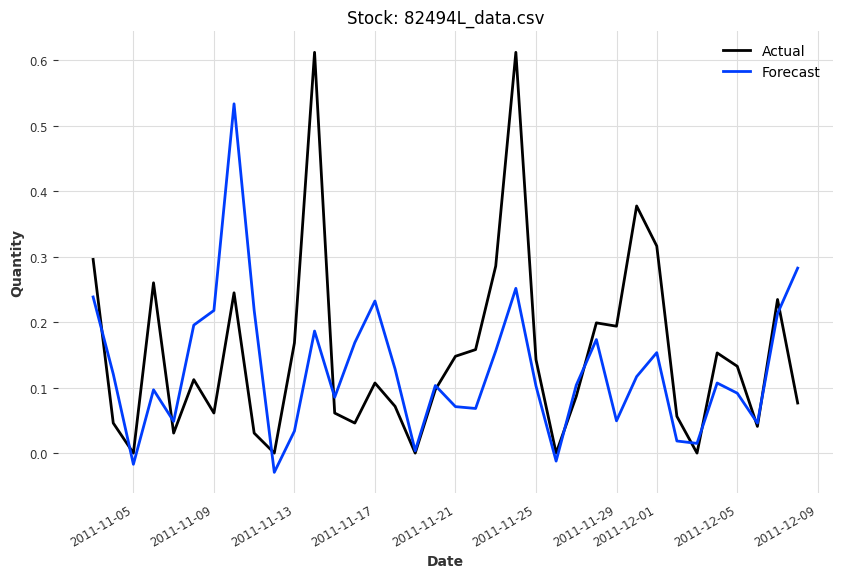

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11


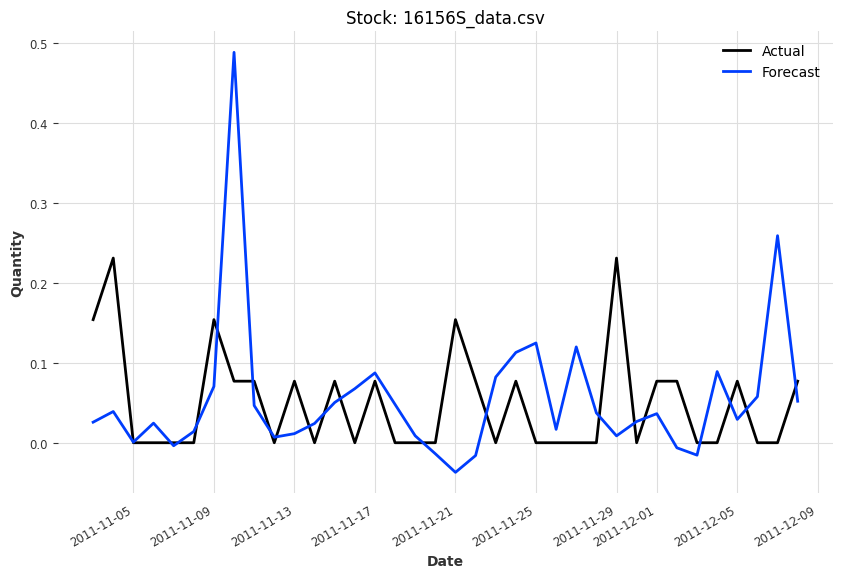

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.20


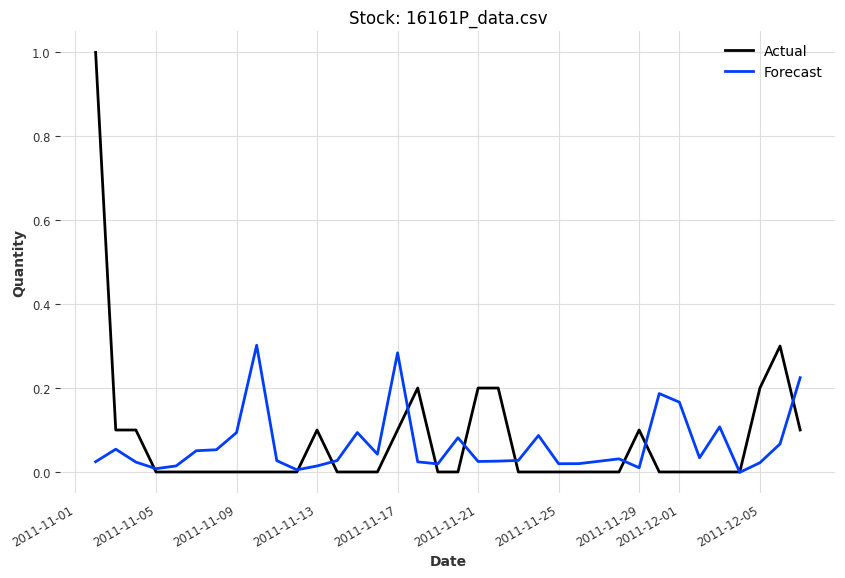

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16


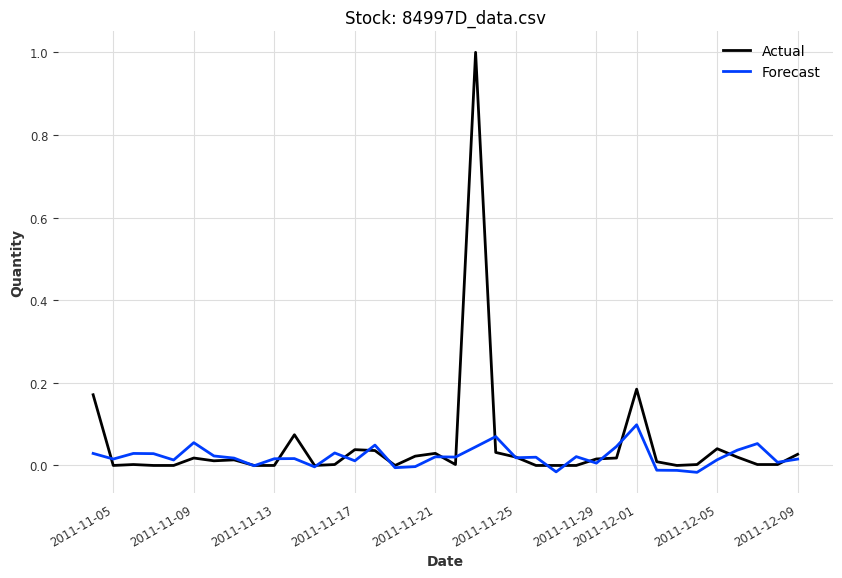

In [178]:
#Predicting Model
model_predict(TiDEModel)

**BlockRNN_test Model**

In [179]:
#Training BlockRNN_test Model
BlockRNN_test = eval_model('BlockRNN_test')

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 5.0 K 
4 | fc            | Sequential       | 312   
---------------------------------------------------
5.3 K     Trainable params
0         Non-trainable params
5.3 K     Total params
0.021     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


Time to train model: 0:02:01.782791


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.12
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17


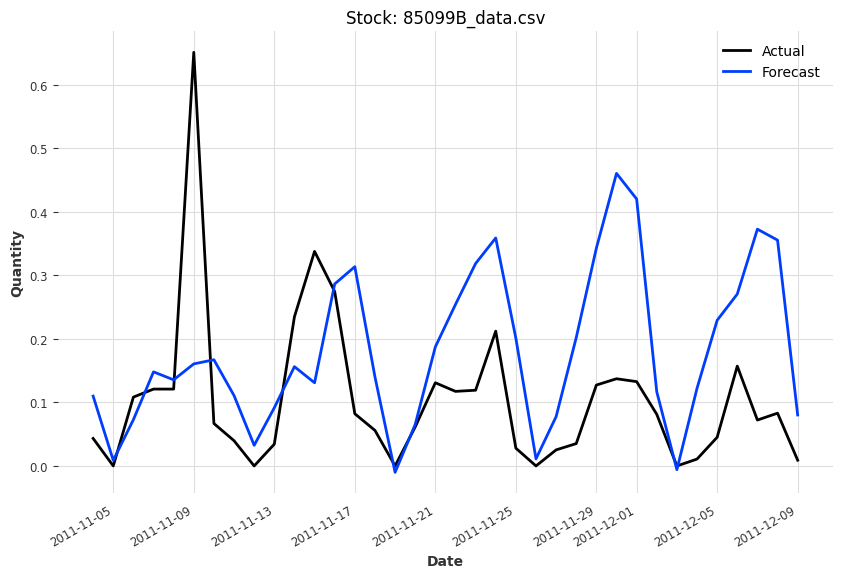

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.19


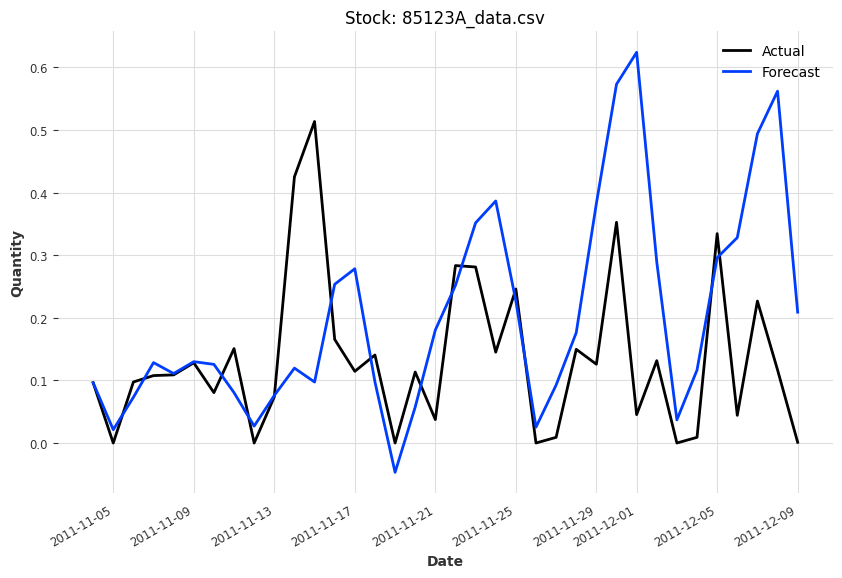

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.08


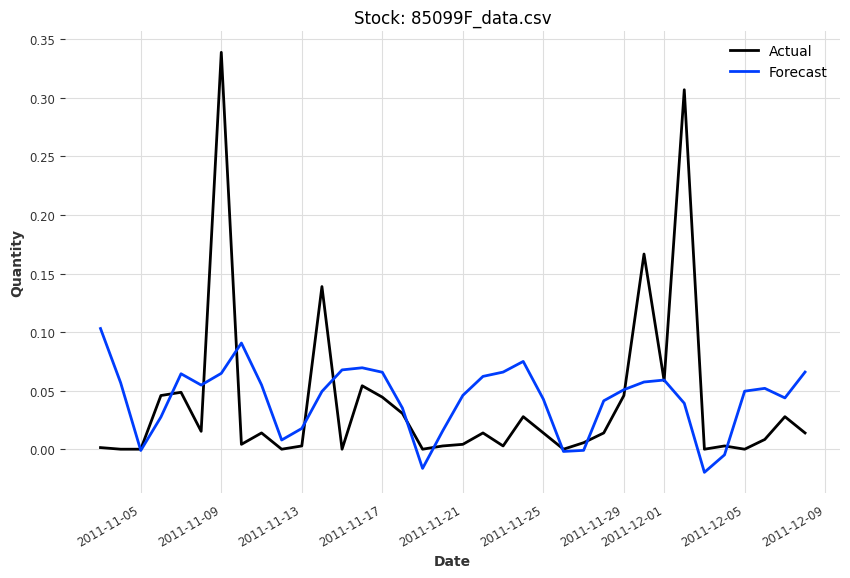

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11


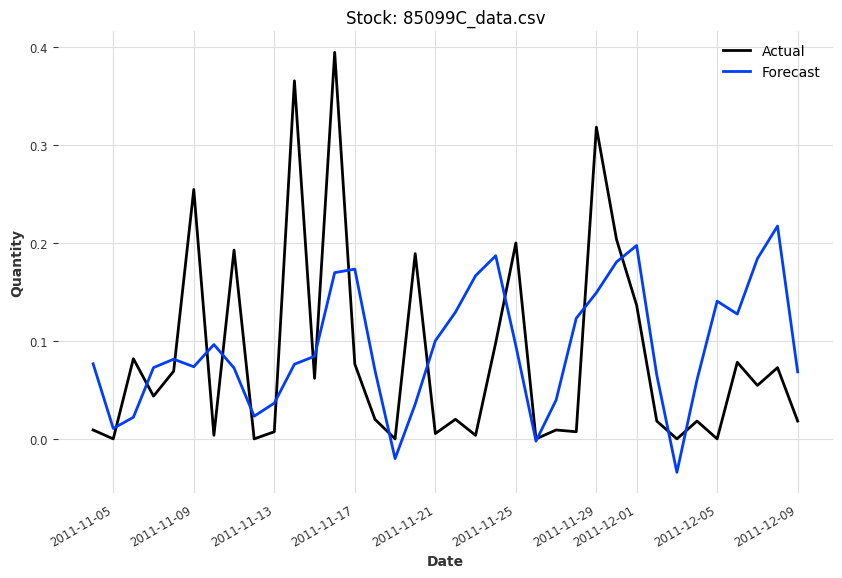

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.10


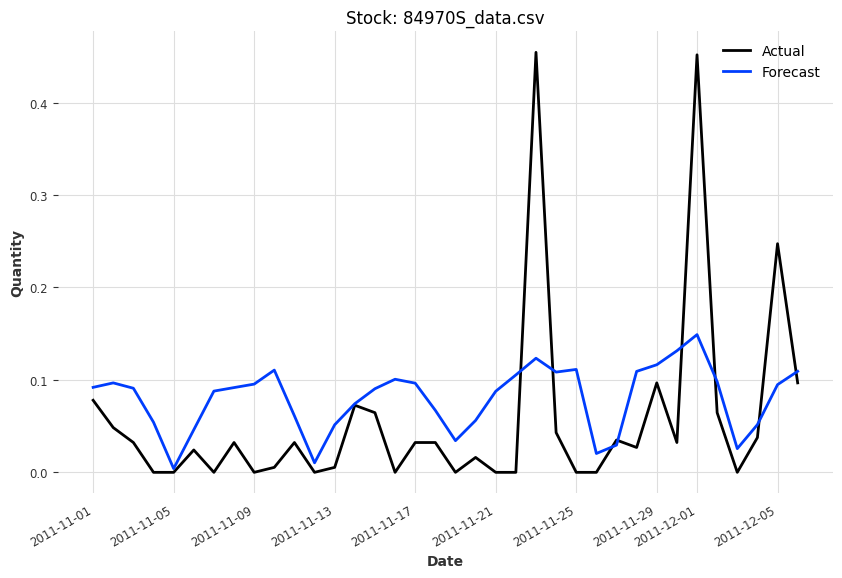

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.06


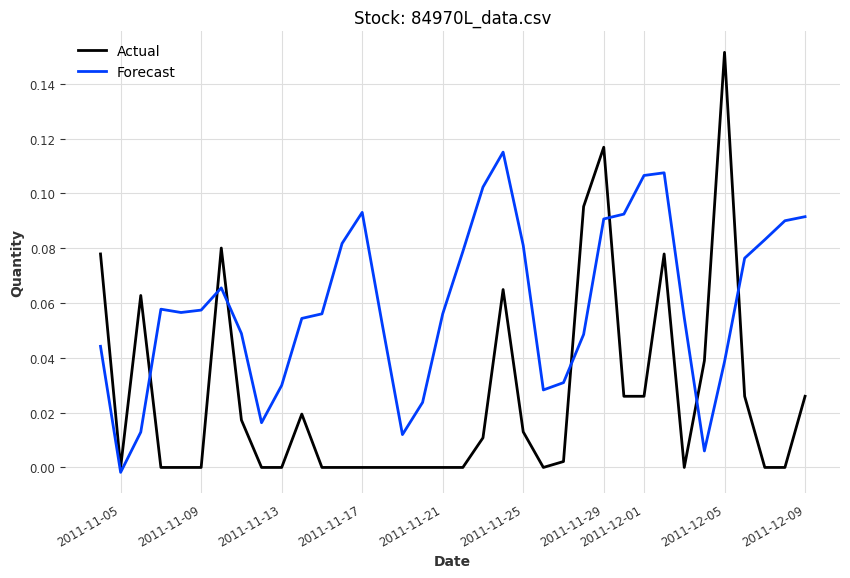

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15


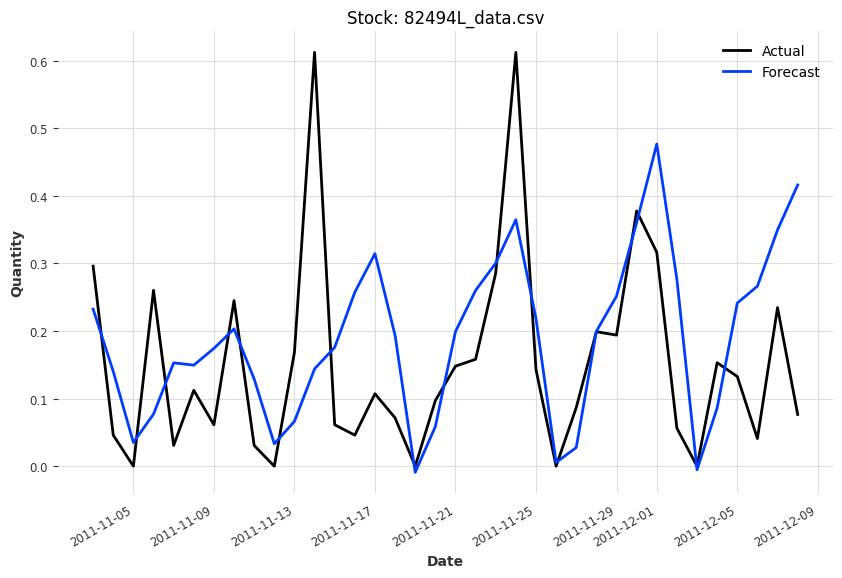

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.09


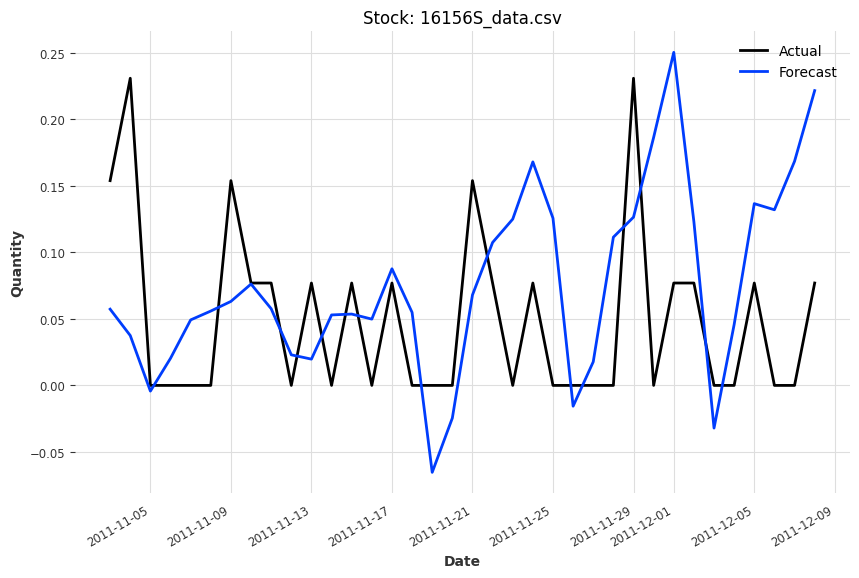

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17


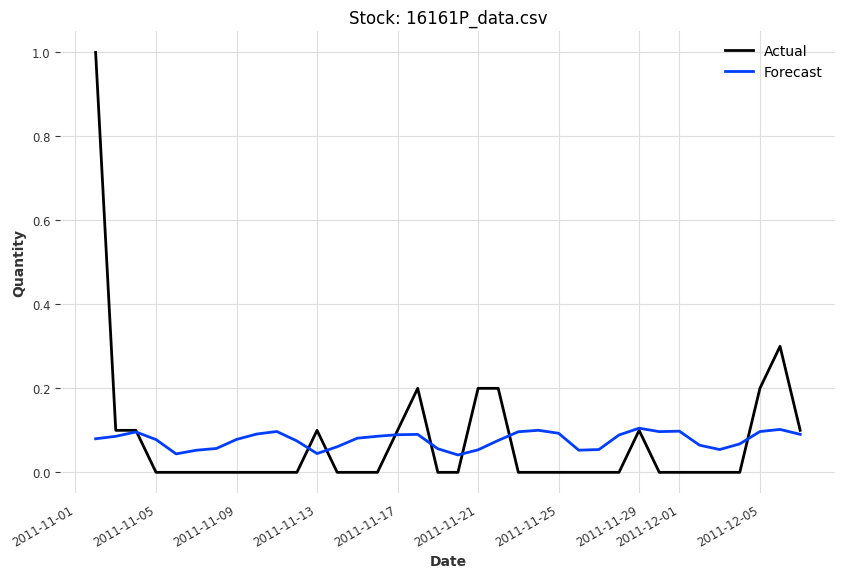

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.16


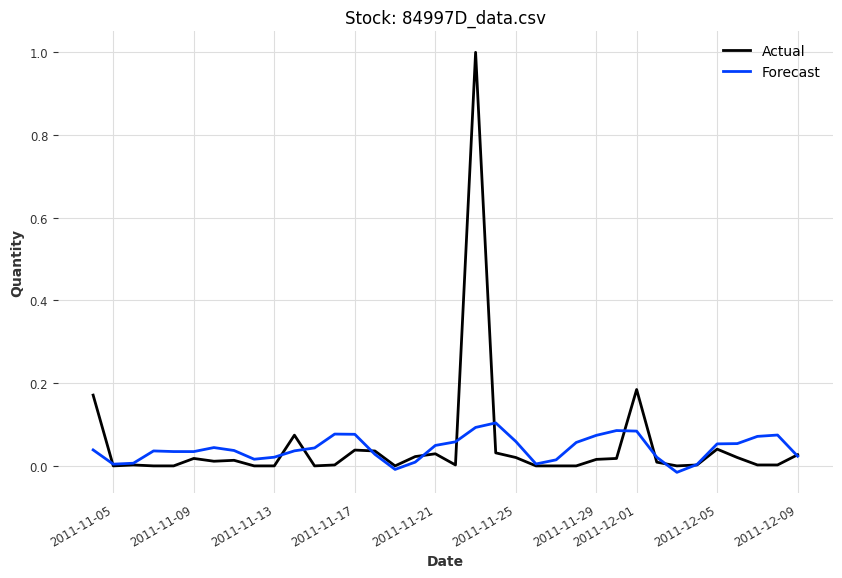

In [180]:
model_predict(BlockRNN_test)

**TCN_model**

In [181]:
#Training TCN_model
TCN_model = eval_model('TCN_model')

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


Time to train model: 0:08:13.235288


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16


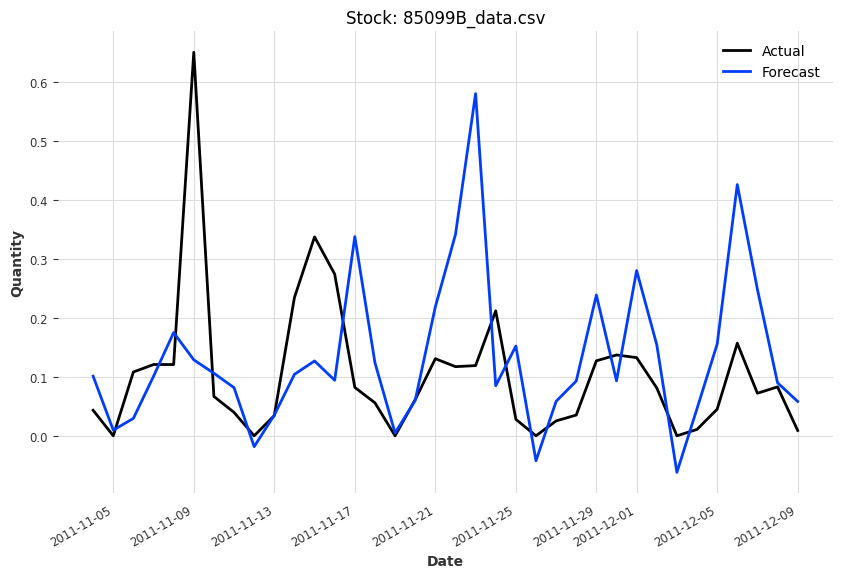

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.12
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18


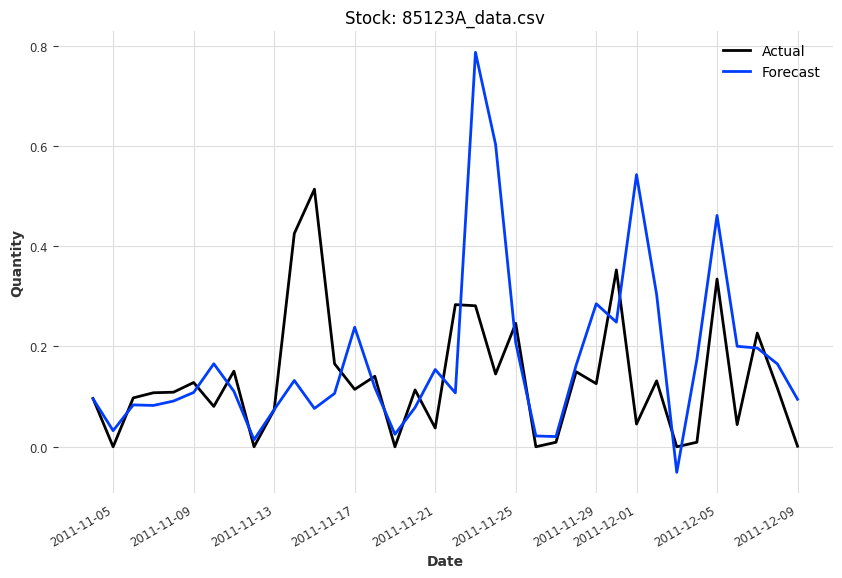

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.08


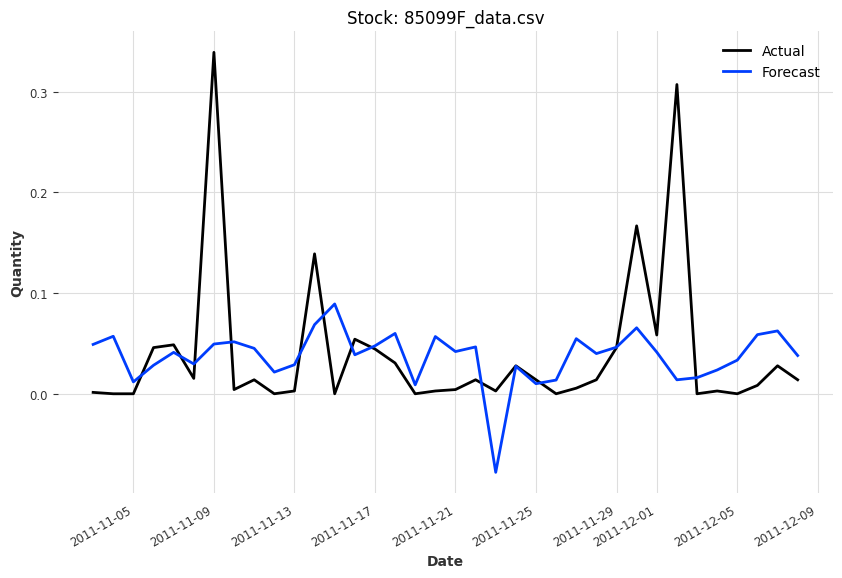

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.12


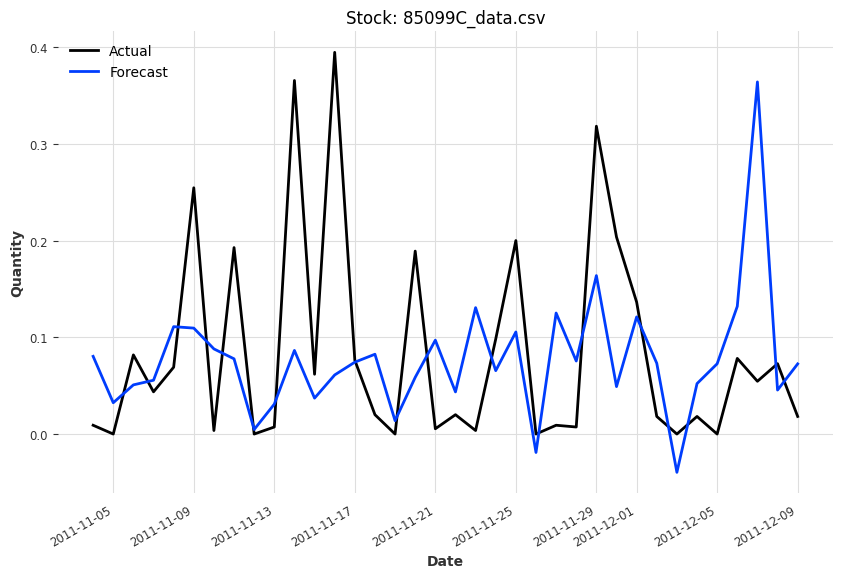

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11


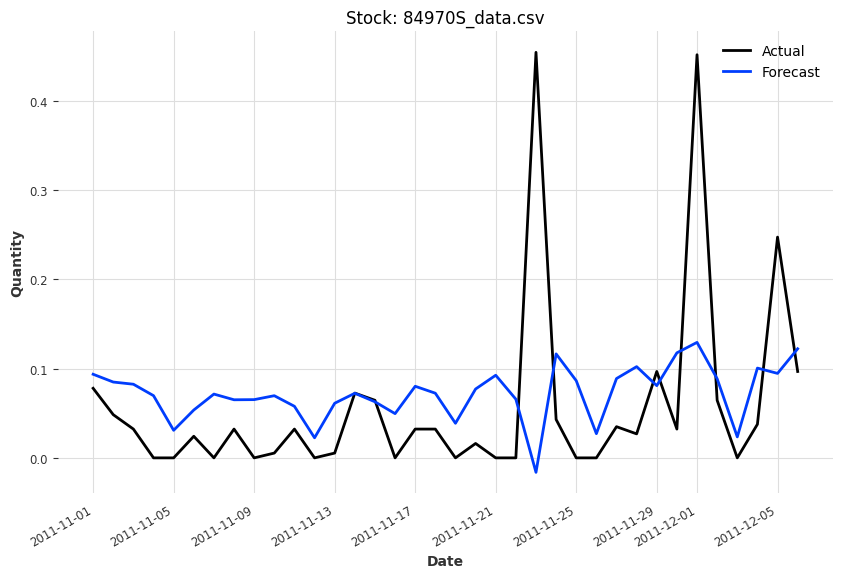

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.06


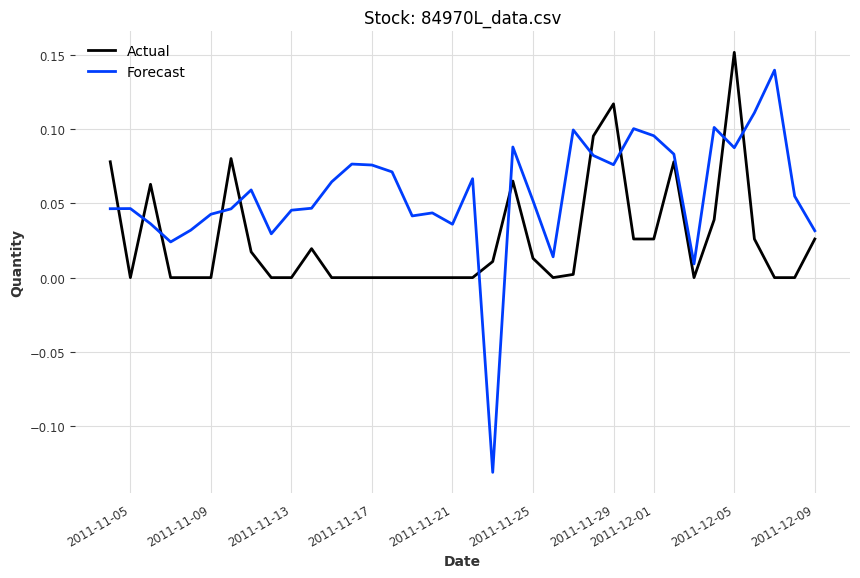

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15


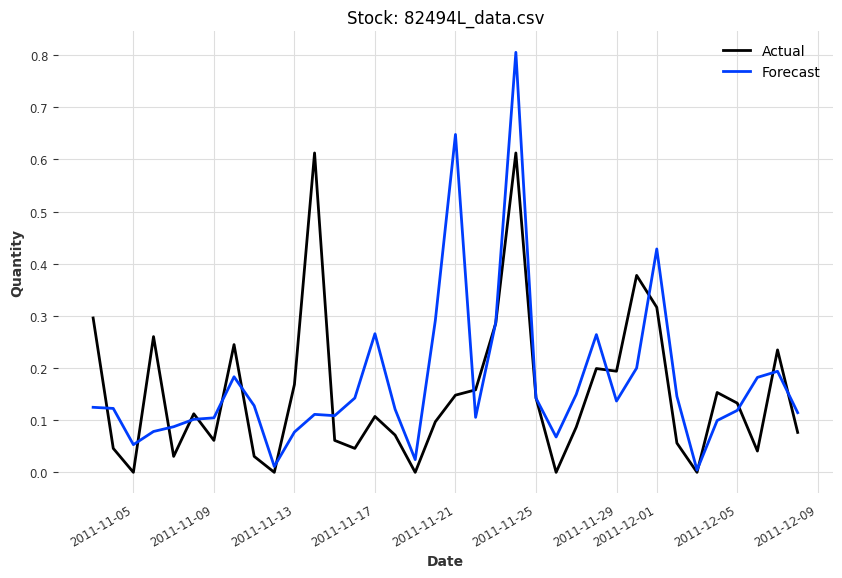

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.07


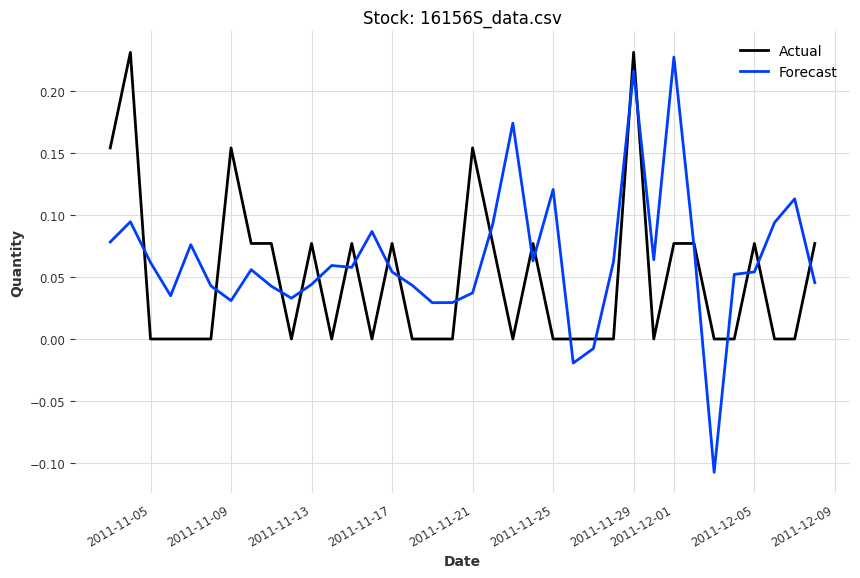

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18


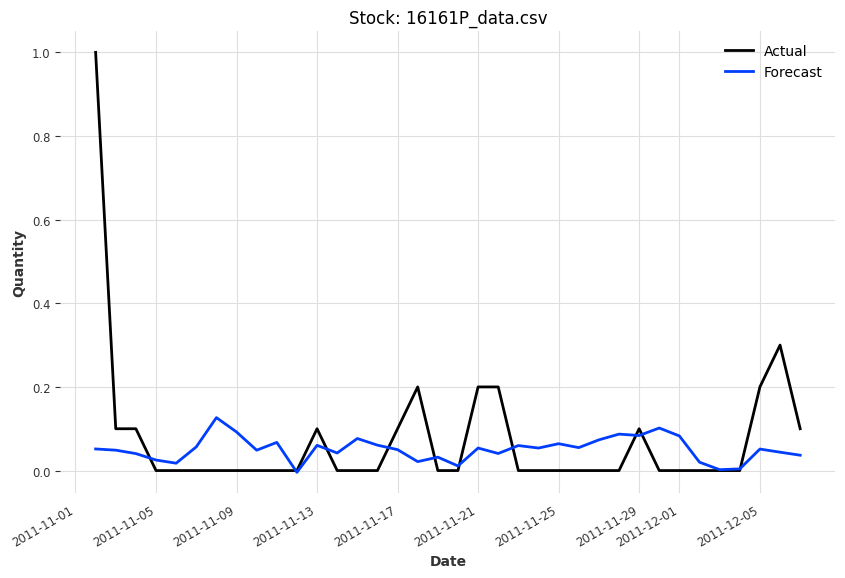

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18


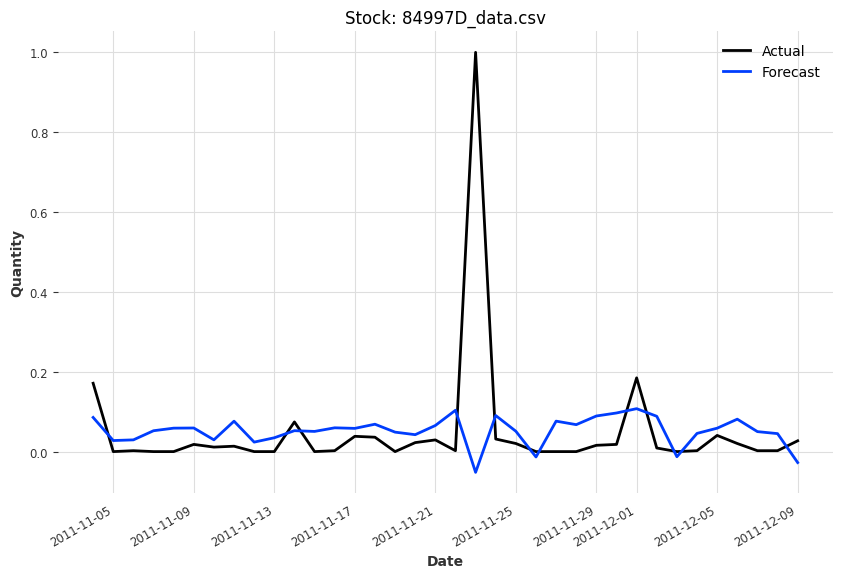

In [182]:
#Predicting
model_predict(TCN_model)